# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
import random
import os
from glob import glob
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Loading data

In [2]:
summ_feed_joined = pd.read_csv('Opioid_analytics/Akhila/overdose_prediction/data/model_final_2007.csv', index_col=False)
summ_feed_joined.shape
summ_feed_joined.head()

(77018, 45)

PATID  TOTAL_MON_COV   AGE GDR_CD RACE STATE  LOS  STD_COST  ICU_IND  \
0  33003284598          193.0  54.0      M    W    MO    1   6358.05        1   
1  33003285835           54.0  64.0      F    W    AZ    6   9566.93        0   
2  33003287387           58.0  38.0      F    W    AZ    2   4917.78        0   
3  33003288343           88.0  62.0      F    W    CO    3  28656.00        0   
4  33003289068           30.0  50.0      M    W    MN    5   5366.61        0   

   ICU_SURG_IND  ...  HEART_REL_PROC_NEG  HEART_REL_PROC_POS  LUNG_REL_PROC  \
0             0  ...                   0                   0              0   
1             0  ...                   0                   0              0   
2             0  ...                   0                   0              0   
3             0  ...                   0                   0              0   
4             0  ...                   0                   0              0   

   OTHER_PROC_NEG  OTHER_PROC_POS  RECTUM_PROC  SPINE_REL_PROC  SUB_REL_PROC  \
0               0               0            0               0             0   
1               0               0            0               0             0   
2               0               0            0               0             0   
3               0               0            0               0             0   
4               0               0            0               0             0   

   URINARY_REL_PROC  OPIOID_HARMED  
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 1              1  

[5 rows x 45 columns]

In [4]:
summ_feed_joined['OPIOID_HARMED'] = summ_feed_joined['OPIOID_HARMED'].astype(str)

In [5]:
summ_feed_joined.dtypes

PATID                     int64
TOTAL_MON_COV           float64
AGE                     float64
GDR_CD                   object
RACE                     object
STATE                    object
LOS                       int64
STD_COST                float64
ICU_IND                   int64
ICU_SURG_IND              int64
MAJ_SURG_IND              int64
MATERNITY_IND             int64
ABDOMEN_REL_DIAG_NEG      int64
ABDOMEN_REL_DIAG_POS      int64
BLOOD_REL_DIAG            int64
HEART_REL_DIAG            int64
HX_TOB_HAZ_DIAG           int64
INJURY_REL_DIAG           int64
KIDNEY_REL_DIAG           int64
LEUK_UNS_DIAG             int64
LIVER_REL_DIAG            int64
LUNG_REL_DIAG             int64
MENTAL_DISORDER_DIAG      int64
OTHER_DIAG_NEG            int64
OTHER_DIAG_POS            int64
PAIN_CONTROL_DIAG         int64
SEC_MAL_NEO_LIV_DIAG      int64
SPINE_REL_DIAG            int64
SUB_ABUSE_DIAG            int64
SUB_WITHDRAWAL_DIAG       int64
ABDOMEN_REL_PROC_NEG      int64
ABDOMEN_

In [6]:
summ_feed_joined['PATID'].nunique()

77018

In [7]:
Counter(summ_feed_joined.OPIOID_HARMED)

Counter({'1': 37644, '0': 39374})

# Exploratory Data Analysis

In [8]:
summ_feed_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77018 entries, 0 to 77017
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PATID                 77018 non-null  int64  
 1   TOTAL_MON_COV         77018 non-null  float64
 2   AGE                   77018 non-null  float64
 3   GDR_CD                77018 non-null  object 
 4   RACE                  77018 non-null  object 
 5   STATE                 77018 non-null  object 
 6   LOS                   77018 non-null  int64  
 7   STD_COST              77018 non-null  float64
 8   ICU_IND               77018 non-null  int64  
 9   ICU_SURG_IND          77018 non-null  int64  
 10  MAJ_SURG_IND          77018 non-null  int64  
 11  MATERNITY_IND         77018 non-null  int64  
 12  ABDOMEN_REL_DIAG_NEG  77018 non-null  int64  
 13  ABDOMEN_REL_DIAG_POS  77018 non-null  int64  
 14  BLOOD_REL_DIAG        77018 non-null  int64  
 15  HEART_REL_DIAG     

<AxesSubplot:>

Text(0.5, 1.0, 'Value counts of the target variable')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

([<matplotlib.axis.XTick at 0x7fea53f43b50>,
 [Text(0, 0, 'Non-opioid harm'), Text(1, 0, 'Opioid harm')])

Text(0, 0.5, 'Count')

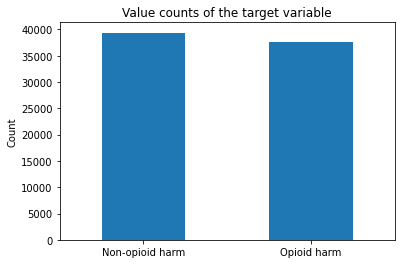

In [9]:
summ_feed_joined.OPIOID_HARMED.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xticks(rotation=0)
# Set the new x-axis labels
plt.xticks([0, 1], ['Non-opioid harm', 'Opioid harm'])
plt.ylabel("Count")
plt.show()

<AxesSubplot:xlabel='age_group', ylabel='count'>

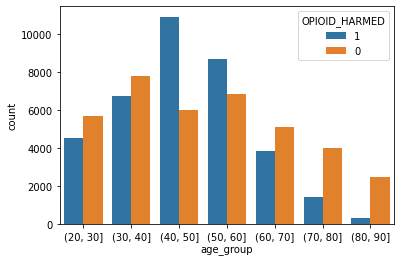

In [10]:
import copy

df = copy.deepcopy(summ_feed_joined)

# Create age groups
df['age_group'] = pd.cut(df['AGE'], [20, 30, 40, 50, 60, 70, 80, 90])

# Create a count plot of target variable across age groups
sns.countplot(x='age_group', hue='OPIOID_HARMED', data=df)

# Show the plot
plt.show()


In [11]:
df = copy.deepcopy(summ_feed_joined)

df.columns

Index(['PATID', 'TOTAL_MON_COV', 'AGE', 'GDR_CD', 'RACE', 'STATE', 'LOS',
       'STD_COST', 'ICU_IND', 'ICU_SURG_IND', 'MAJ_SURG_IND', 'MATERNITY_IND',
       'ABDOMEN_REL_DIAG_NEG', 'ABDOMEN_REL_DIAG_POS', 'BLOOD_REL_DIAG',
       'HEART_REL_DIAG', 'HX_TOB_HAZ_DIAG', 'INJURY_REL_DIAG',
       'KIDNEY_REL_DIAG', 'LEUK_UNS_DIAG', 'LIVER_REL_DIAG', 'LUNG_REL_DIAG',
       'MENTAL_DISORDER_DIAG', 'OTHER_DIAG_NEG', 'OTHER_DIAG_POS',
       'PAIN_CONTROL_DIAG', 'SEC_MAL_NEO_LIV_DIAG', 'SPINE_REL_DIAG',
       'SUB_ABUSE_DIAG', 'SUB_WITHDRAWAL_DIAG', 'ABDOMEN_REL_PROC_NEG',
       'ABDOMEN_REL_PROC_POS', 'BLOOD_REL_PROC', 'BONE_REL_PROC',
       'BRAIN_REL_PROC', 'HEART_REL_PROC_NEG', 'HEART_REL_PROC_POS',
       'LUNG_REL_PROC', 'OTHER_PROC_NEG', 'OTHER_PROC_POS', 'RECTUM_PROC',
       'SPINE_REL_PROC', 'SUB_REL_PROC', 'URINARY_REL_PROC', 'OPIOID_HARMED'],
      dtype='object')

In [12]:
df = summ_feed_joined[~summ_feed_joined.isin([np.nan, np.inf, -np.inf]).any(1)]
df.shape

(77018, 45)

In [13]:
num_cols = list(df.select_dtypes(include=[np.number]).columns)
num_cols.remove('PATID')
num_cols.remove('TOTAL_MON_COV')
cat_cols = list(df.select_dtypes(exclude=[np.number]).columns)

In [14]:
df[num_cols].describe()

AGE           LOS      STD_COST       ICU_IND  ICU_SURG_IND  \
count  77018.000000  77018.000000  7.701800e+04  77018.000000  77018.000000   
mean      47.834935      7.474746  2.633592e+04      0.335740      0.122478   
std       16.720277     16.253135  4.430173e+04      0.693235      0.369825   
min       11.000000      1.000000 -3.352586e+05      0.000000      0.000000   
25%       35.000000      2.000000  8.430480e+03      0.000000      0.000000   
50%       47.000000      3.000000  1.492898e+04      0.000000      0.000000   
75%       59.000000      7.000000  2.833578e+04      1.000000      0.000000   
max       90.000000   1003.000000  4.272351e+06     14.000000      7.000000   

       MAJ_SURG_IND  MATERNITY_IND  ABDOMEN_REL_DIAG_NEG  \
count  77018.000000   77018.000000          77018.000000   
mean       0.537433       0.127269              0.010153   
std        0.614671       0.365816              0.107260   
min        0.000000       0.000000              0.000000   
25%        0.000000       0.000000              0.000000   
50%        0.000000       0.000000              0.000000   
75%        1.000000       0.000000              0.000000   
max        9.000000       7.000000              4.000000   

       ABDOMEN_REL_DIAG_POS  BLOOD_REL_DIAG  ...  BRAIN_REL_PROC  \
count          77018.000000    77018.000000  ...    77018.000000   
mean               0.083344        0.093368  ...        0.003804   
std                0.413178        0.335743  ...        0.064245   
min                0.000000        0.000000  ...        0.000000   
25%                0.000000        0.000000  ...        0.000000   
50%                0.000000        0.000000  ...        0.000000   
75%                0.000000        0.000000  ...        0.000000   
max               16.000000        8.000000  ...        3.000000   

       HEART_REL_PROC_NEG  HEART_REL_PROC_POS  LUNG_REL_PROC  OTHER_PROC_NEG  \
count        77018.000000        77018.000000   77018.000000    77018.000000   
mean             0.013490            0.050663       0.014620        0.029629   
std              0.147825            0.243814       0.129397        0.176026   
min              0.000000            0.000000       0.000000        0.000000   
25%              0.000000            0.000000       0.000000        0.000000   
50%              0.000000            0.000000       0.000000        0.000000   
75%              0.000000            0.000000       0.000000        0.000000   
max             10.000000            5.000000       6.000000        4.000000   

       OTHER_PROC_POS   RECTUM_PROC  SPINE_REL_PROC  SUB_REL_PROC  \
count    77018.000000  77018.000000    77018.000000  77018.000000   
mean         0.039796      0.000013        0.037225      0.013737   
std          0.202399      0.003603        0.193721      0.129994   
min          0.000000      0.000000        0.000000      0.000000   
25%          0.000000      0.000000        0.000000      0.000000   
50%          0.000000      0.000000        0.000000      0.000000   
75%          0.000000      0.000000        0.000000      0.000000   
max          3.000000      1.000000        3.000000      5.000000   

       URINARY_REL_PROC  
count      77018.000000  
mean           0.012750  
std            0.115952  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            3.000000  

[8 rows x 39 columns]

In [15]:
df[df['STD_COST'] < 0].shape

df[df['LOS'] < 0].shape

(370, 45)

(0, 45)

In [16]:
df['STD_COST'] = np.where(df['STD_COST'] < 0, 0, df['STD_COST'])
df[df['STD_COST'] < 0].shape

df['LOS'] = np.where(df['LOS'] < 0, 0, df['LOS'])
df[df['LOS'] < 0].shape

(0, 45)

(0, 45)

In [17]:
np.percentile(df['AGE'], [80, 85, 90, 93, 95, 97, 99, 100])

np.percentile(df['LOS'], [80, 85, 90, 93, 95, 97, 99, 100])

np.percentile(df['STD_COST'], [80, 85, 90, 93, 95, 97, 99, 100])

array([62., 66., 71., 76., 78., 82., 87., 90.])

array([   8.,   11.,   16.,   21.,   27.,   39.,   73., 1003.])

array([  34180.91  ,   42222.902 ,   55328.934 ,   69511.689 ,
         84063.5225,  108191.16  ,  191941.9172, 4272350.83  ])

Text(0.5, 1.0, 'Distribution plot for AGE')

Text(0.5, 6.799999999999997, 'AGE')

Text(-2.5749999999999957, 0.5, 'Frequency')

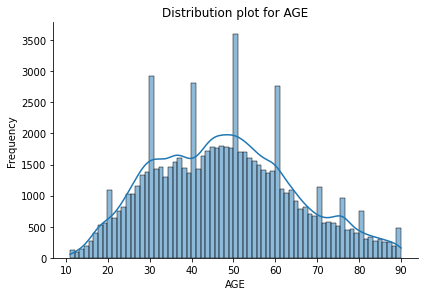

Text(0.5, 1.0, 'Distribution plot for LOS')

Text(0.5, 6.799999999999997, 'LOS')

Text(-8.824999999999996, 0.5, 'Frequency')

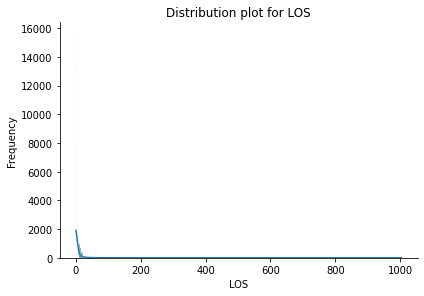

Text(0.5, 1.0, 'Distribution plot for STD_COST')

Text(0.5, 6.799999999999997, 'STD_COST')

Text(-2.4499999999999957, 0.5, 'Frequency')

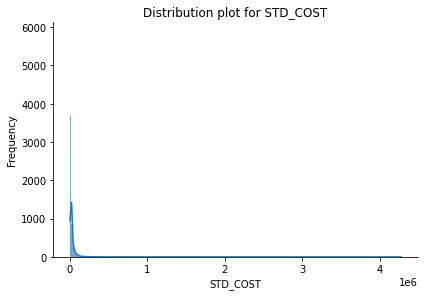

Text(0.5, 1.0, 'Distribution plot for ICU_IND')

Text(0.5, 6.799999999999997, 'ICU_IND')

Text(-8.699999999999996, 0.5, 'Frequency')

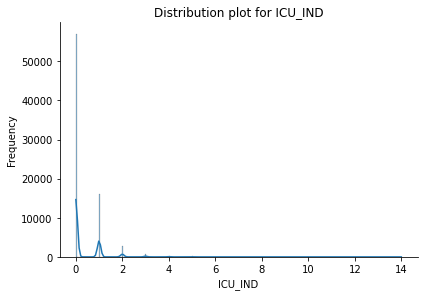

Text(0.5, 1.0, 'Distribution plot for ICU_SURG_IND')

Text(0.5, 6.799999999999997, 'ICU_SURG_IND')

Text(-15.074999999999996, 0.5, 'Frequency')

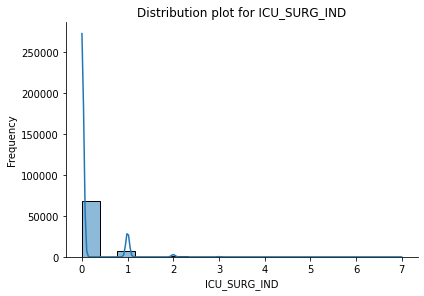

Text(0.5, 1.0, 'Distribution plot for MAJ_SURG_IND')

Text(0.5, 6.799999999999997, 'MAJ_SURG_IND')

Text(-8.824999999999996, 0.5, 'Frequency')

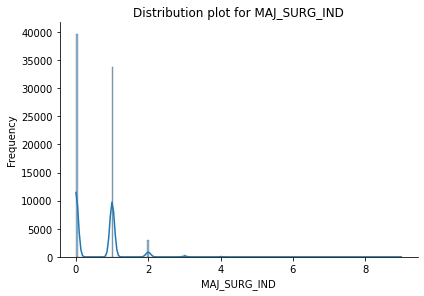

Text(0.5, 1.0, 'Distribution plot for MATERNITY_IND')

Text(0.5, 6.799999999999997, 'MATERNITY_IND')

Text(-15.074999999999996, 0.5, 'Frequency')

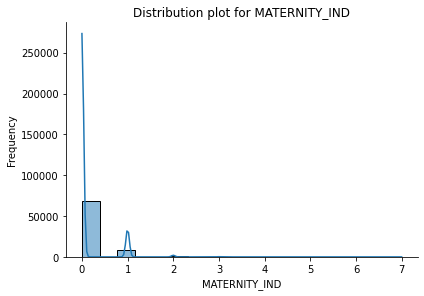

Text(0.5, 1.0, 'Distribution plot for ABDOMEN_REL_DIAG_NEG')

Text(0.5, 6.799999999999997, 'ABDOMEN_REL_DIAG_NEG')

Text(-14.949999999999996, 0.5, 'Frequency')

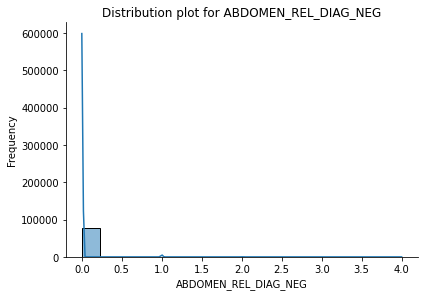

Text(0.5, 1.0, 'Distribution plot for ABDOMEN_REL_DIAG_POS')

Text(0.5, 6.799999999999997, 'ABDOMEN_REL_DIAG_POS')

Text(-14.949999999999996, 0.5, 'Frequency')

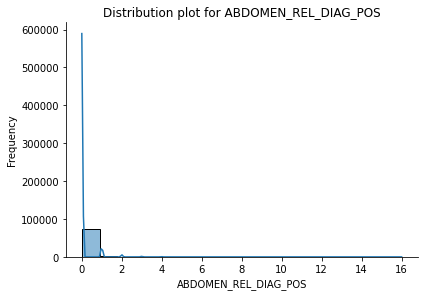

Text(0.5, 1.0, 'Distribution plot for BLOOD_REL_DIAG')

Text(0.5, 6.799999999999997, 'BLOOD_REL_DIAG')

Text(-15.074999999999996, 0.5, 'Frequency')

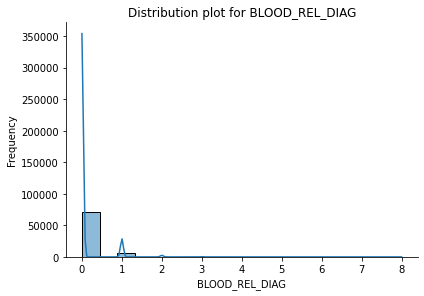

Text(0.5, 1.0, 'Distribution plot for HEART_REL_DIAG')

Text(0.5, 6.799999999999997, 'HEART_REL_DIAG')

Text(-15.074999999999996, 0.5, 'Frequency')

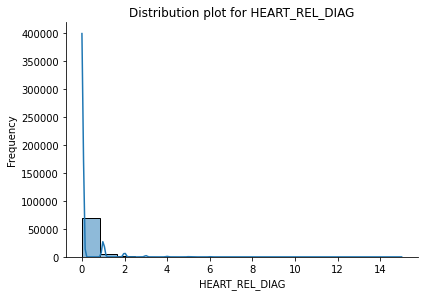

Text(0.5, 1.0, 'Distribution plot for HX_TOB_HAZ_DIAG')

Text(0.5, 6.799999999999997, 'HX_TOB_HAZ_DIAG')

Text(-15.074999999999996, 0.5, 'Frequency')

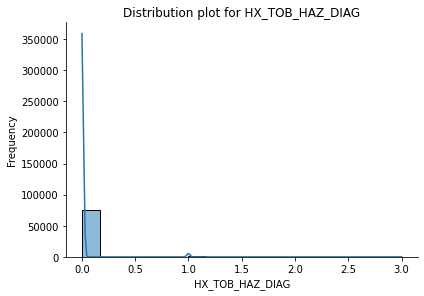

Text(0.5, 1.0, 'Distribution plot for INJURY_REL_DIAG')

Text(0.5, 6.799999999999997, 'INJURY_REL_DIAG')

Text(-14.949999999999996, 0.5, 'Frequency')

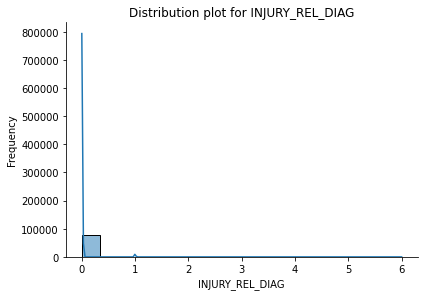

Text(0.5, 1.0, 'Distribution plot for KIDNEY_REL_DIAG')

Text(0.5, 6.799999999999997, 'KIDNEY_REL_DIAG')

Text(-14.949999999999996, 0.5, 'Frequency')

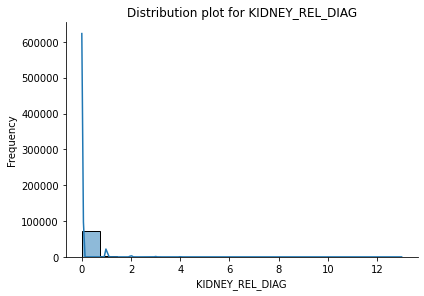

Text(0.5, 1.0, 'Distribution plot for LEUK_UNS_DIAG')

Text(0.5, 6.799999999999997, 'LEUK_UNS_DIAG')

Text(-14.949999999999996, 0.5, 'Frequency')

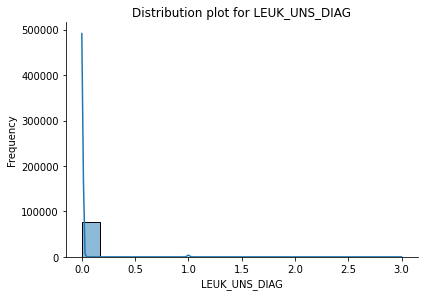

Text(0.5, 1.0, 'Distribution plot for LIVER_REL_DIAG')

Text(0.5, 6.799999999999997, 'LIVER_REL_DIAG')

Text(-14.949999999999996, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution plot for LUNG_REL_DIAG')

Text(0.5, 6.799999999999997, 'LUNG_REL_DIAG')

Text(-15.074999999999996, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution plot for MENTAL_DISORDER_DIAG')

Text(0.5, 6.799999999999997, 'MENTAL_DISORDER_DIAG')

Text(-15.074999999999996, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution plot for OTHER_DIAG_NEG')

Text(0.5, 6.799999999999997, 'OTHER_DIAG_NEG')

Text(-14.949999999999996, 0.5, 'Frequency')

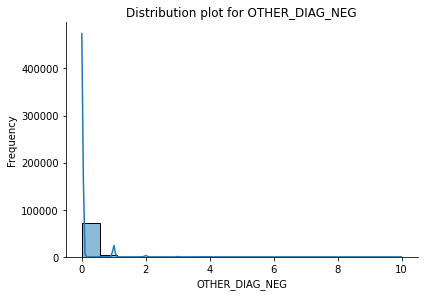

Text(0.5, 1.0, 'Distribution plot for OTHER_DIAG_POS')

Text(0.5, 6.799999999999997, 'OTHER_DIAG_POS')

Text(-8.699999999999996, 0.5, 'Frequency')

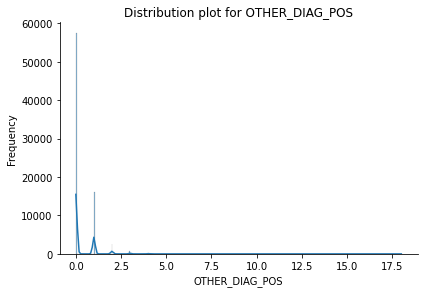

Text(0.5, 1.0, 'Distribution plot for PAIN_CONTROL_DIAG')

Text(0.5, 6.799999999999997, 'PAIN_CONTROL_DIAG')

Text(-15.074999999999996, 0.5, 'Frequency')

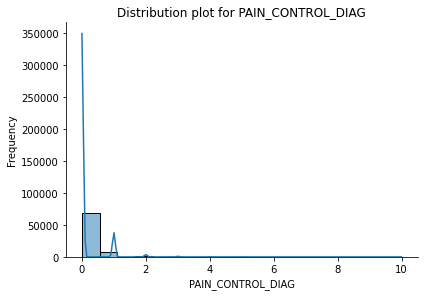

Text(0.5, 1.0, 'Distribution plot for SEC_MAL_NEO_LIV_DIAG')

Text(0.5, 6.799999999999997, 'SEC_MAL_NEO_LIV_DIAG')

Text(-14.949999999999996, 0.5, 'Frequency')

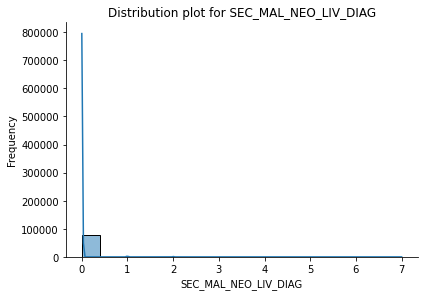

Text(0.5, 1.0, 'Distribution plot for SPINE_REL_DIAG')

Text(0.5, 6.799999999999997, 'SPINE_REL_DIAG')

Text(-15.074999999999996, 0.5, 'Frequency')

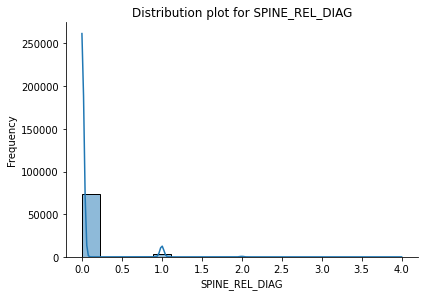

Text(0.5, 1.0, 'Distribution plot for SUB_ABUSE_DIAG')

Text(0.5, 6.799999999999997, 'SUB_ABUSE_DIAG')

Text(-14.949999999999996, 0.5, 'Frequency')

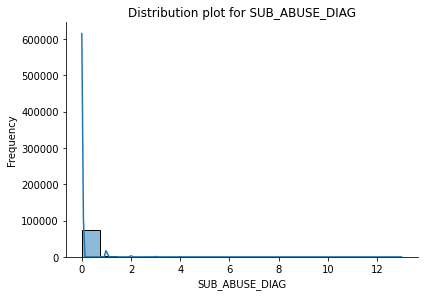

Text(0.5, 1.0, 'Distribution plot for SUB_WITHDRAWAL_DIAG')

Text(0.5, 6.799999999999997, 'SUB_WITHDRAWAL_DIAG')

Text(-14.949999999999996, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution plot for ABDOMEN_REL_PROC_NEG')

Text(0.5, 6.799999999999997, 'ABDOMEN_REL_PROC_NEG')

Text(-15.074999999999996, 0.5, 'Frequency')

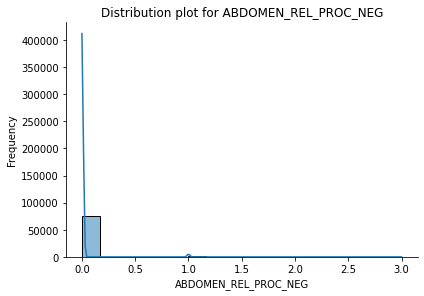

Text(0.5, 1.0, 'Distribution plot for ABDOMEN_REL_PROC_POS')

Text(0.5, 6.799999999999997, 'ABDOMEN_REL_PROC_POS')

Text(-15.074999999999996, 0.5, 'Frequency')

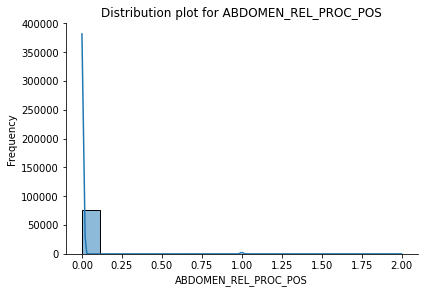

Text(0.5, 1.0, 'Distribution plot for BLOOD_REL_PROC')

Text(0.5, 6.799999999999997, 'BLOOD_REL_PROC')

Text(-14.949999999999996, 0.5, 'Frequency')

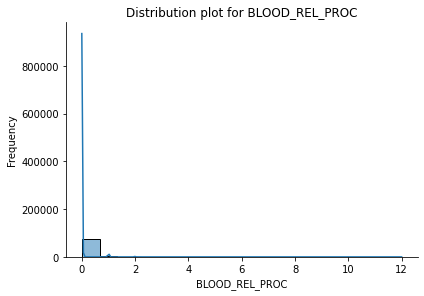

Text(0.5, 1.0, 'Distribution plot for BONE_REL_PROC')

Text(0.5, 6.799999999999997, 'BONE_REL_PROC')

Text(-15.074999999999996, 0.5, 'Frequency')

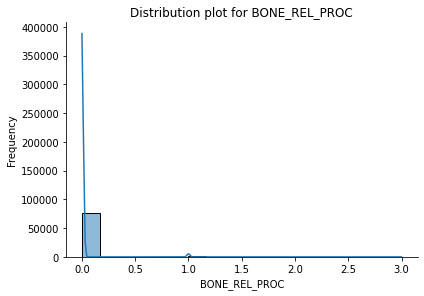

Text(0.5, 1.0, 'Distribution plot for BRAIN_REL_PROC')

Text(0.5, 6.799999999999997, 'BRAIN_REL_PROC')

Text(-14.949999999999996, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution plot for HEART_REL_PROC_NEG')

Text(0.5, 6.799999999999997, 'HEART_REL_PROC_NEG')

Text(6.800000000000004, 0.5, 'Frequency')

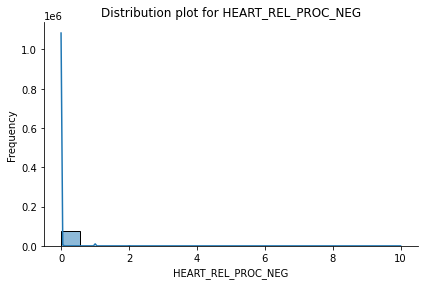

Text(0.5, 1.0, 'Distribution plot for HEART_REL_PROC_POS')

Text(0.5, 6.799999999999997, 'HEART_REL_PROC_POS')

Text(-15.074999999999996, 0.5, 'Frequency')

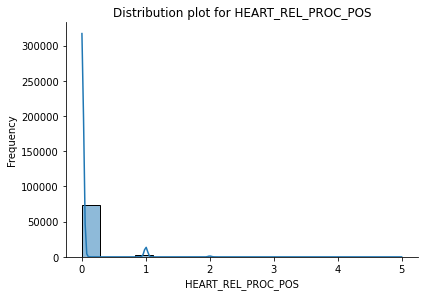

Text(0.5, 1.0, 'Distribution plot for LUNG_REL_PROC')

Text(0.5, 6.799999999999997, 'LUNG_REL_PROC')

Text(-14.949999999999996, 0.5, 'Frequency')

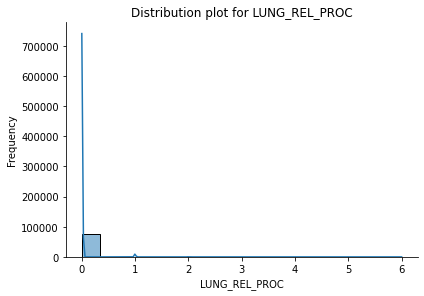

Text(0.5, 1.0, 'Distribution plot for OTHER_PROC_NEG')

Text(0.5, 6.799999999999997, 'OTHER_PROC_NEG')

Text(-15.074999999999996, 0.5, 'Frequency')

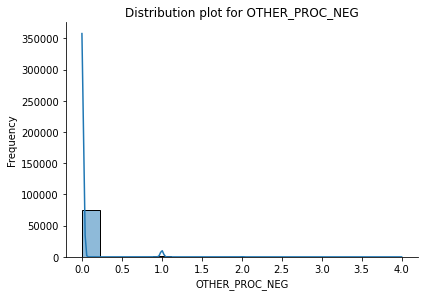

Text(0.5, 1.0, 'Distribution plot for OTHER_PROC_POS')

Text(0.5, 6.799999999999997, 'OTHER_PROC_POS')

Text(-15.074999999999996, 0.5, 'Frequency')

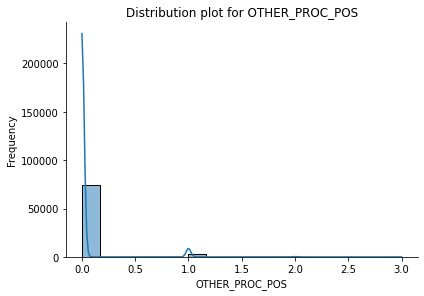

Text(0.5, 1.0, 'Distribution plot for RECTUM_PROC')

Text(0.5, 6.799999999999997, 'RECTUM_PROC')

Text(16.300000000000004, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution plot for SPINE_REL_PROC')

Text(0.5, 6.799999999999997, 'SPINE_REL_PROC')

Text(-15.074999999999996, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution plot for SUB_REL_PROC')

Text(0.5, 6.799999999999997, 'SUB_REL_PROC')

Text(-14.949999999999996, 0.5, 'Frequency')

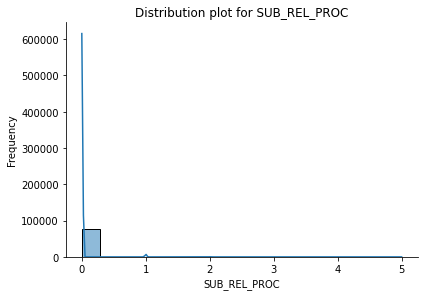

Text(0.5, 1.0, 'Distribution plot for URINARY_REL_PROC')

Text(0.5, 6.799999999999997, 'URINARY_REL_PROC')

Text(-15.074999999999996, 0.5, 'Frequency')

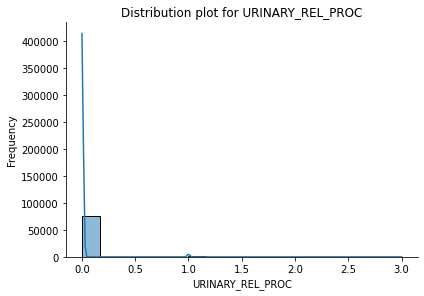

In [18]:
# Distribution plots

height = 4
aspect = 1.5

for col in num_cols:
    sns.displot(df[col], kde=True, height=height, aspect=aspect)
    plt.title(f'Distribution plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

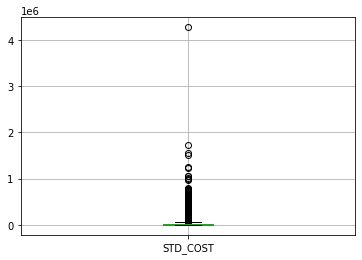

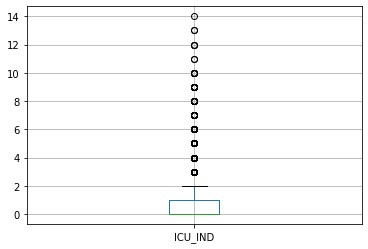

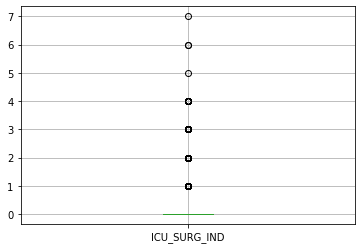

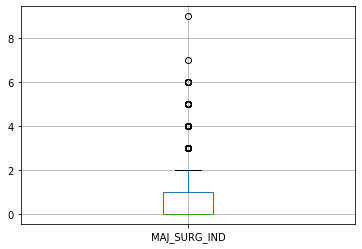

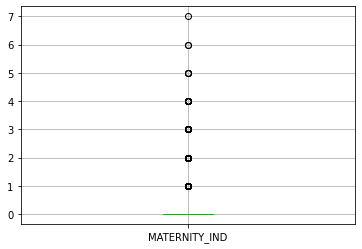

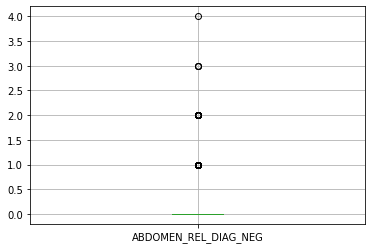

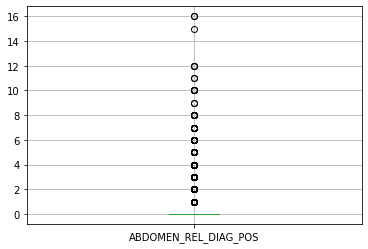

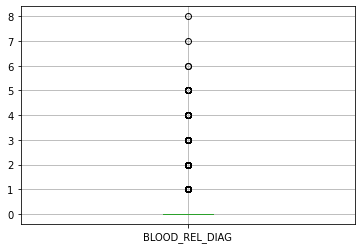

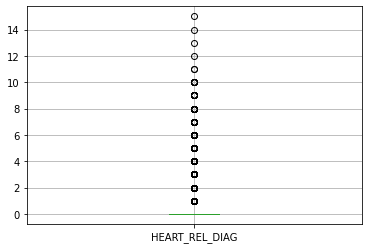

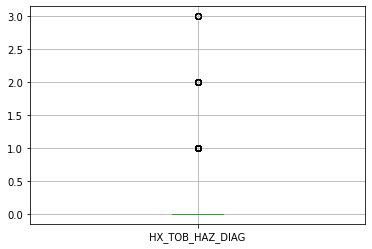

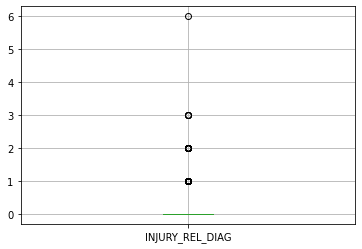

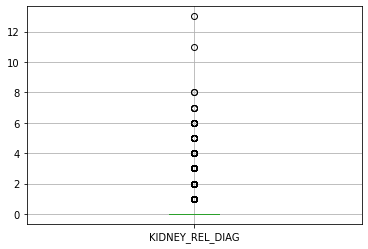

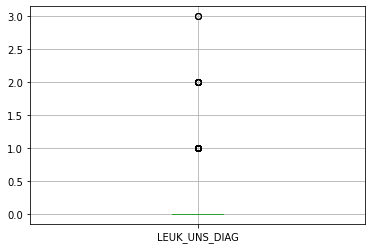

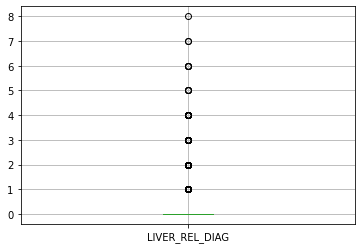

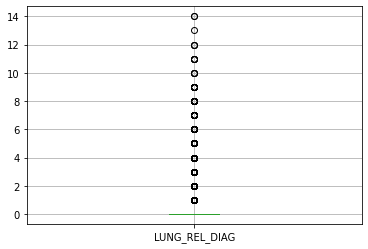

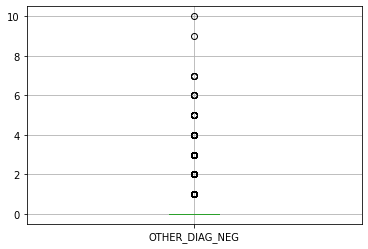

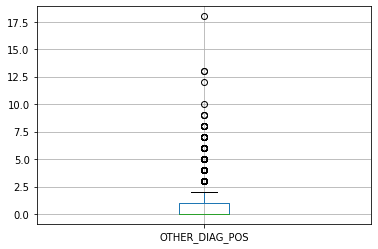

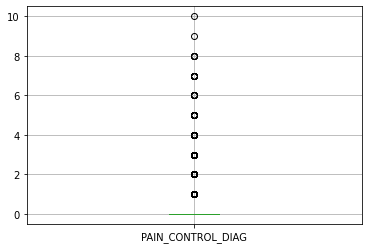

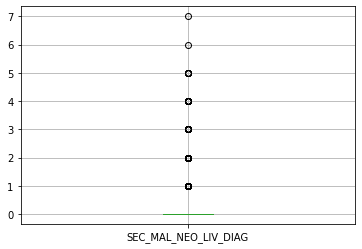

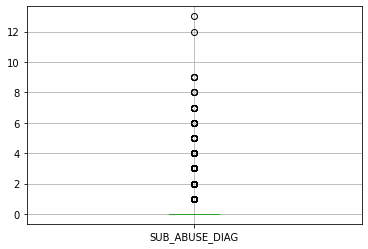

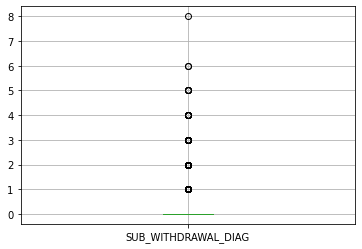

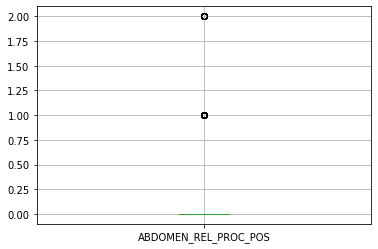

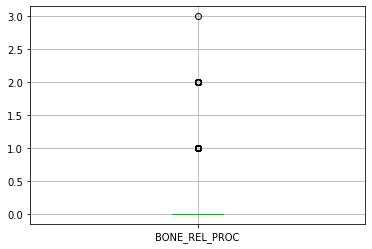

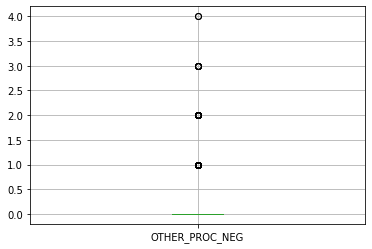

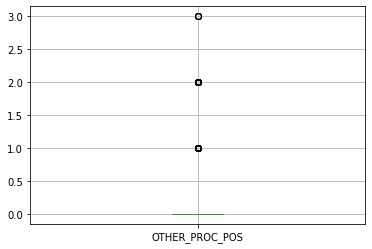

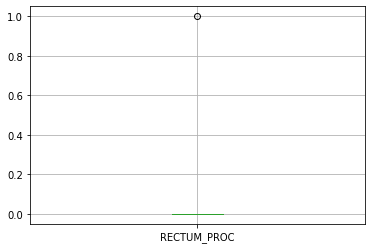

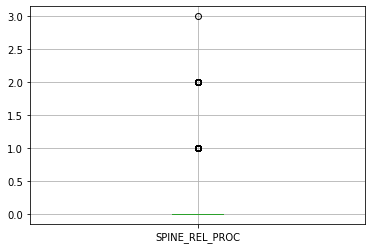

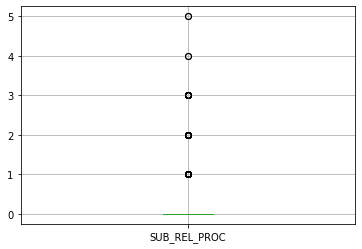

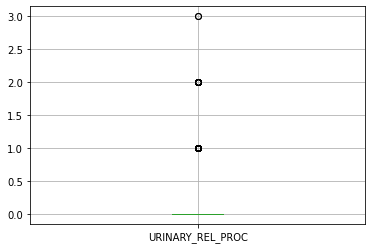

In [19]:
# Box plots

for col in num_cols:
    plt.figure()
    df.boxplot([col])

Text(0.5, 1.0, 'Q-Q plot for AGE')

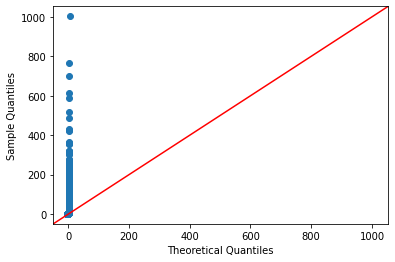

Text(0.5, 1.0, 'Q-Q plot for LOS')

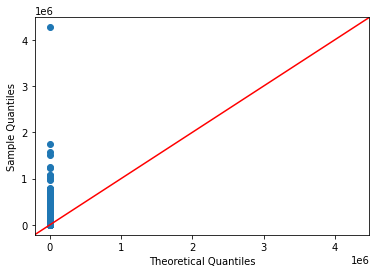

Text(0.5, 1.0, 'Q-Q plot for STD_COST')

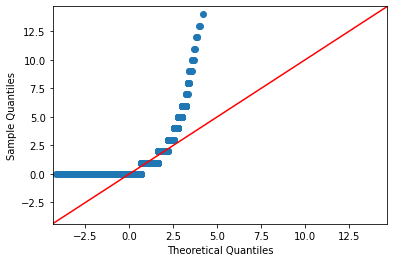

Text(0.5, 1.0, 'Q-Q plot for ICU_IND')

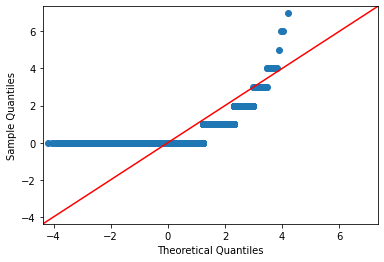

Text(0.5, 1.0, 'Q-Q plot for ICU_SURG_IND')

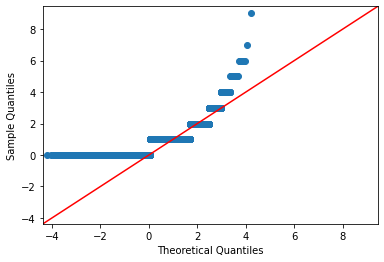

Text(0.5, 1.0, 'Q-Q plot for MAJ_SURG_IND')

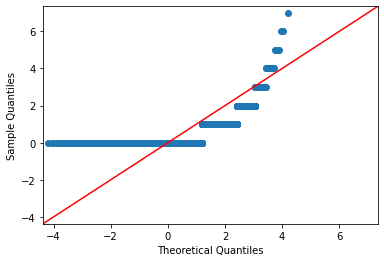

Text(0.5, 1.0, 'Q-Q plot for MATERNITY_IND')

Text(0.5, 1.0, 'Q-Q plot for ABDOMEN_REL_DIAG_NEG')

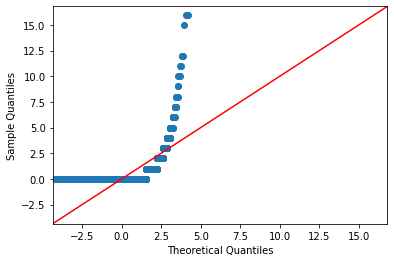

Text(0.5, 1.0, 'Q-Q plot for ABDOMEN_REL_DIAG_POS')

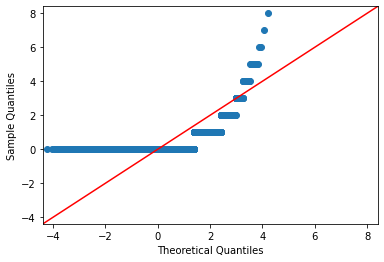

Text(0.5, 1.0, 'Q-Q plot for BLOOD_REL_DIAG')

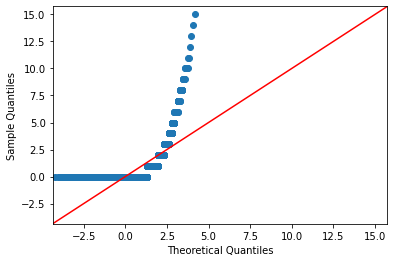

Text(0.5, 1.0, 'Q-Q plot for HEART_REL_DIAG')

Text(0.5, 1.0, 'Q-Q plot for HX_TOB_HAZ_DIAG')

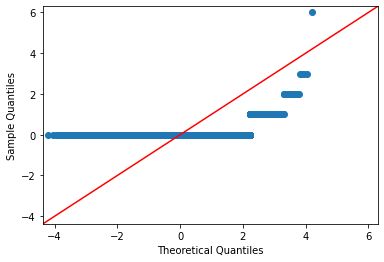

Text(0.5, 1.0, 'Q-Q plot for INJURY_REL_DIAG')

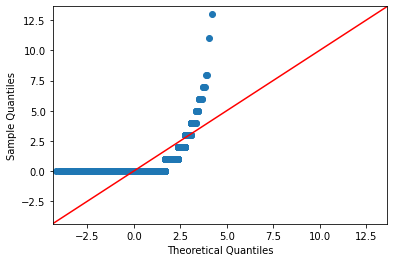

Text(0.5, 1.0, 'Q-Q plot for KIDNEY_REL_DIAG')

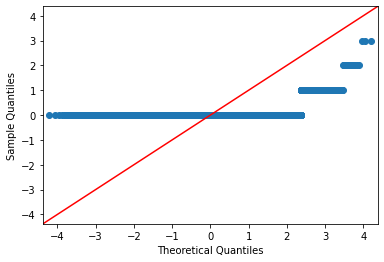

Text(0.5, 1.0, 'Q-Q plot for LEUK_UNS_DIAG')

Text(0.5, 1.0, 'Q-Q plot for LIVER_REL_DIAG')

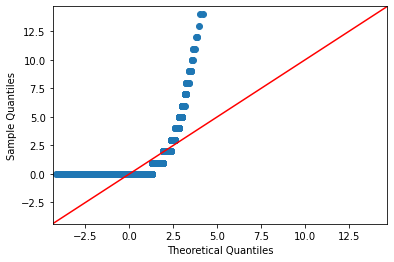

Text(0.5, 1.0, 'Q-Q plot for LUNG_REL_DIAG')

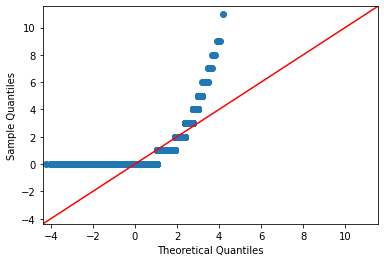

Text(0.5, 1.0, 'Q-Q plot for MENTAL_DISORDER_DIAG')

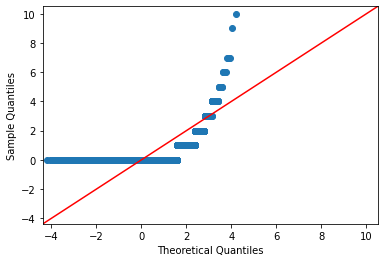

Text(0.5, 1.0, 'Q-Q plot for OTHER_DIAG_NEG')

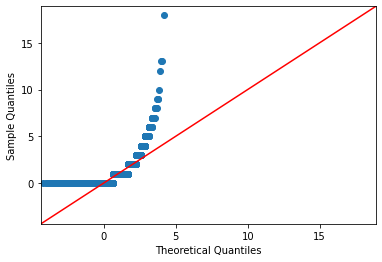

Text(0.5, 1.0, 'Q-Q plot for OTHER_DIAG_POS')

Text(0.5, 1.0, 'Q-Q plot for PAIN_CONTROL_DIAG')

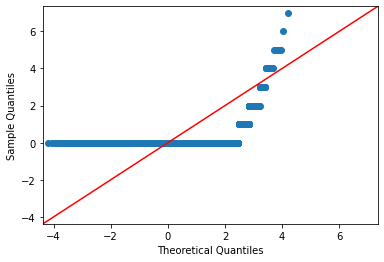

Text(0.5, 1.0, 'Q-Q plot for SEC_MAL_NEO_LIV_DIAG')

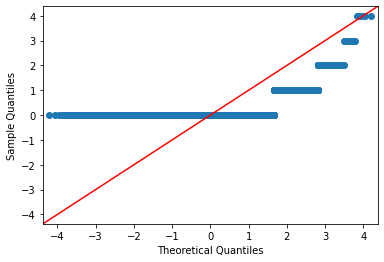

Text(0.5, 1.0, 'Q-Q plot for SPINE_REL_DIAG')

Text(0.5, 1.0, 'Q-Q plot for SUB_ABUSE_DIAG')

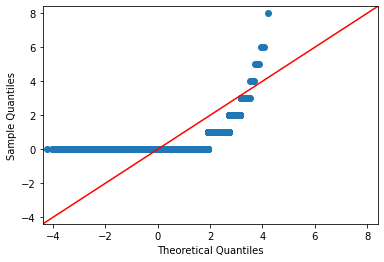

Text(0.5, 1.0, 'Q-Q plot for SUB_WITHDRAWAL_DIAG')

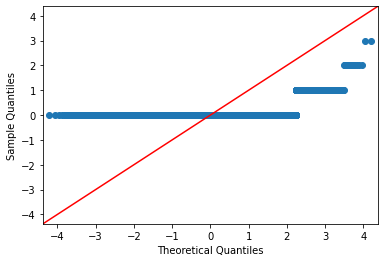

Text(0.5, 1.0, 'Q-Q plot for ABDOMEN_REL_PROC_NEG')

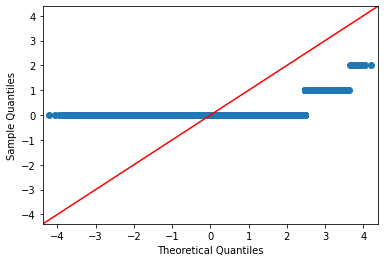

Text(0.5, 1.0, 'Q-Q plot for ABDOMEN_REL_PROC_POS')

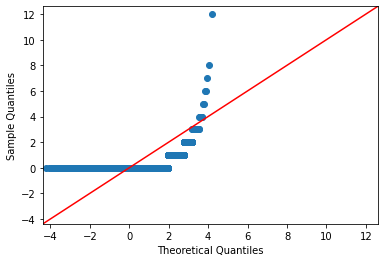

Text(0.5, 1.0, 'Q-Q plot for BLOOD_REL_PROC')

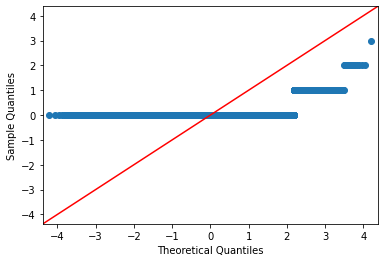

Text(0.5, 1.0, 'Q-Q plot for BONE_REL_PROC')

Text(0.5, 1.0, 'Q-Q plot for BRAIN_REL_PROC')

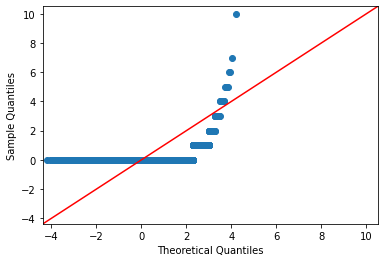

Text(0.5, 1.0, 'Q-Q plot for HEART_REL_PROC_NEG')

Text(0.5, 1.0, 'Q-Q plot for HEART_REL_PROC_POS')

Text(0.5, 1.0, 'Q-Q plot for LUNG_REL_PROC')

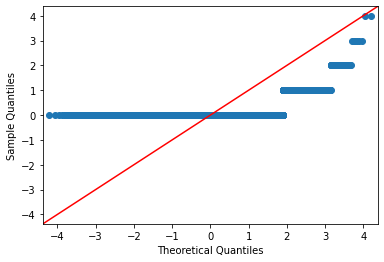

Text(0.5, 1.0, 'Q-Q plot for OTHER_PROC_NEG')

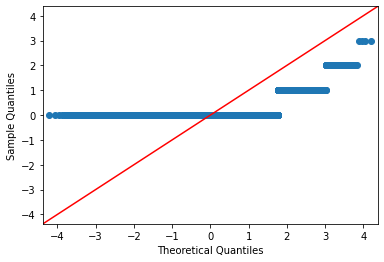

Text(0.5, 1.0, 'Q-Q plot for OTHER_PROC_POS')

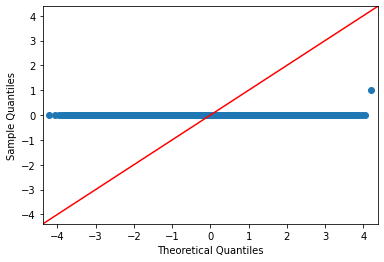

Text(0.5, 1.0, 'Q-Q plot for RECTUM_PROC')

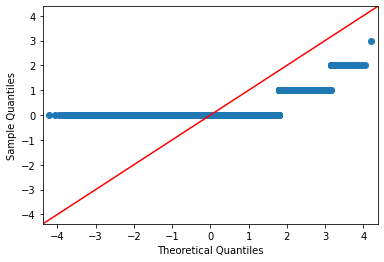

Text(0.5, 1.0, 'Q-Q plot for SPINE_REL_PROC')

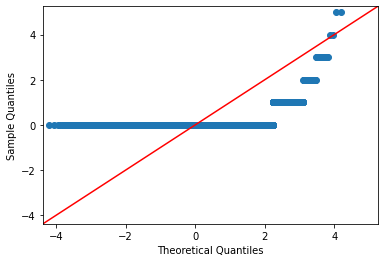

Text(0.5, 1.0, 'Q-Q plot for SUB_REL_PROC')

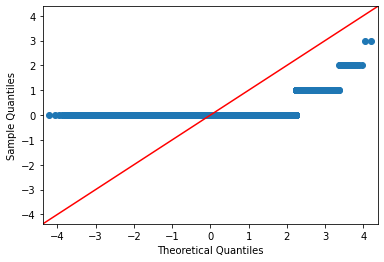

Text(0.5, 1.0, 'Q-Q plot for URINARY_REL_PROC')

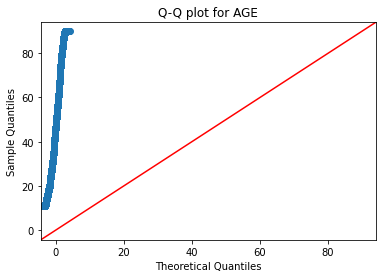

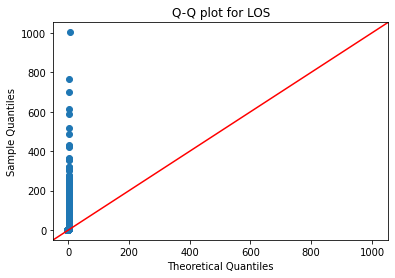

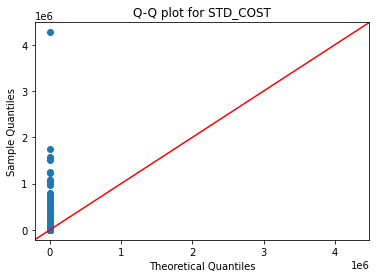

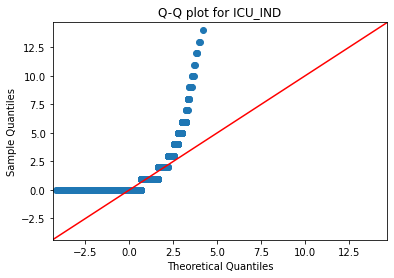

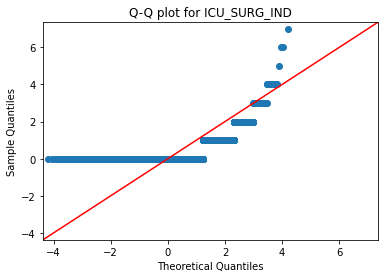

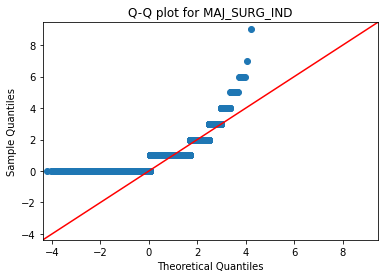

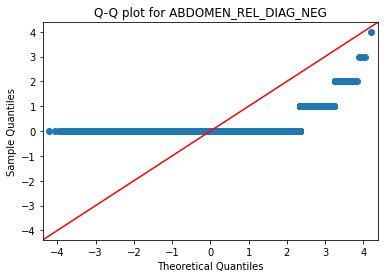

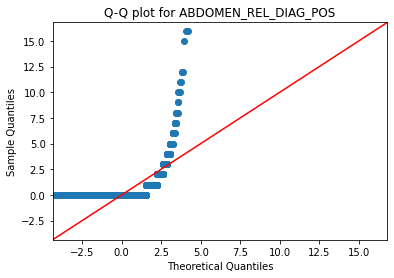

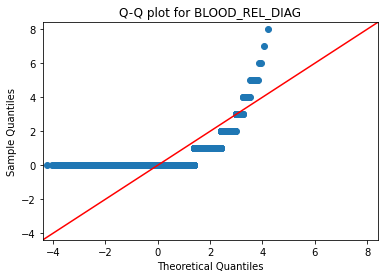

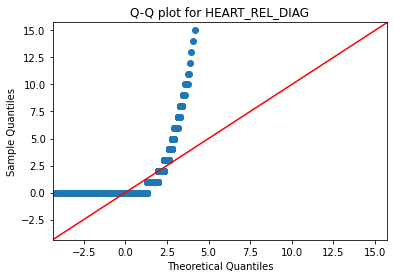

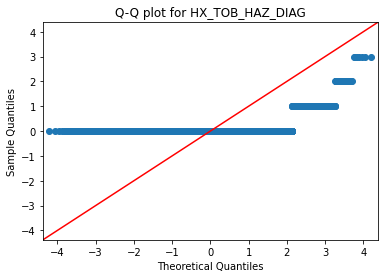

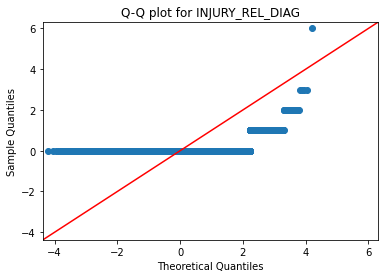

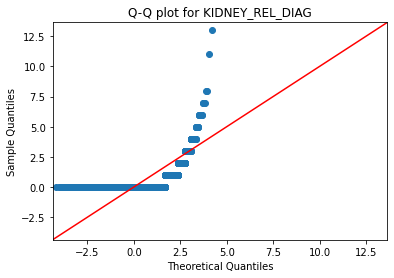

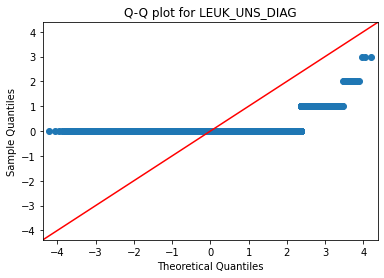

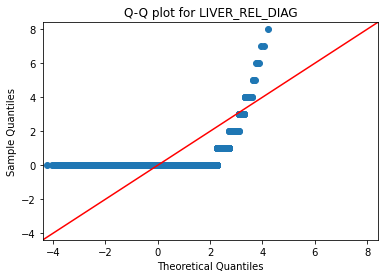

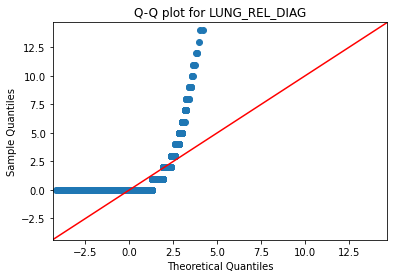

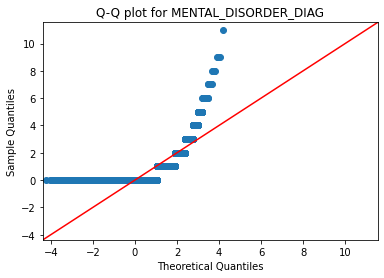

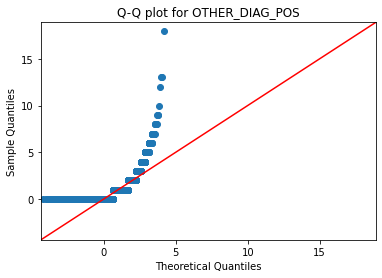

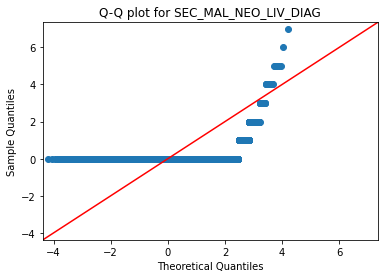

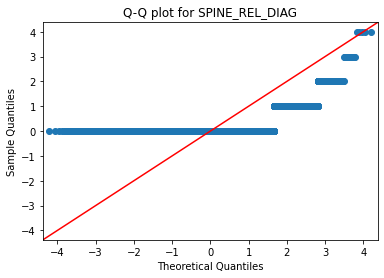

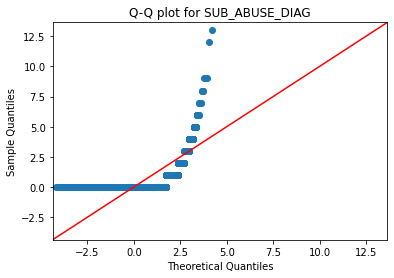

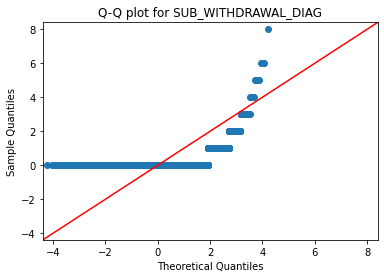

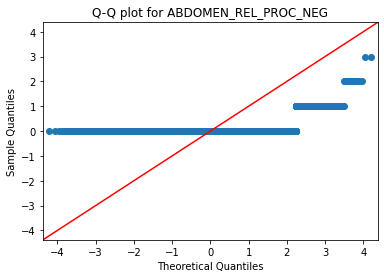

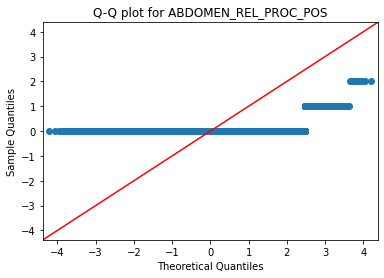

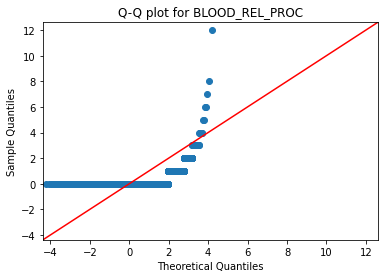

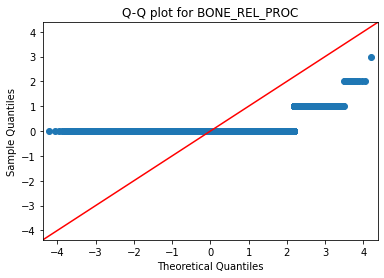

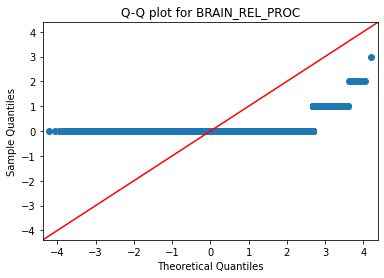

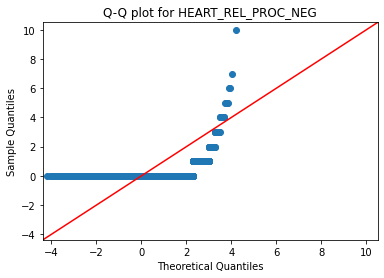

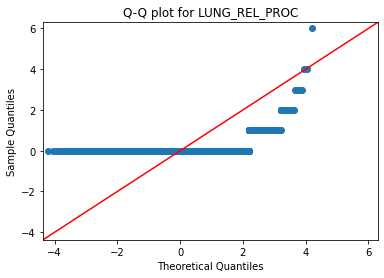

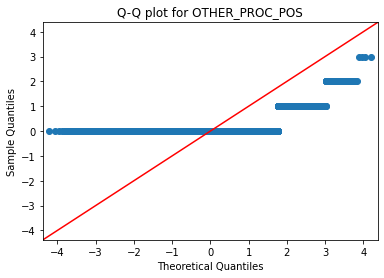

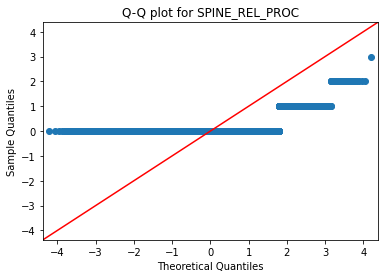

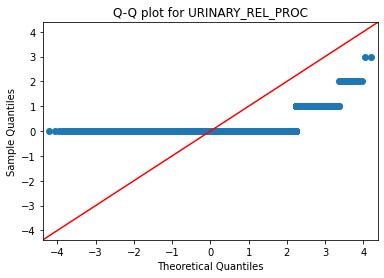

In [20]:
# create a Q-Q plot using statsmodels

# set the figure size for the plots
fig_width = 4
fig_height = 6

for col in num_cols:
    sm.qqplot(df[col], line='45')
    plt.title(f'Q-Q plot for {col}')

plt.show()

In [21]:
df.head()

PATID  TOTAL_MON_COV   AGE GDR_CD RACE STATE  LOS  STD_COST  ICU_IND  \
0  33003284598          193.0  54.0      M    W    MO    1   6358.05        1   
1  33003285835           54.0  64.0      F    W    AZ    6   9566.93        0   
2  33003287387           58.0  38.0      F    W    AZ    2   4917.78        0   
3  33003288343           88.0  62.0      F    W    CO    3  28656.00        0   
4  33003289068           30.0  50.0      M    W    MN    5   5366.61        0   

   ICU_SURG_IND  ...  HEART_REL_PROC_NEG  HEART_REL_PROC_POS  LUNG_REL_PROC  \
0             0  ...                   0                   0              0   
1             0  ...                   0                   0              0   
2             0  ...                   0                   0              0   
3             0  ...                   0                   0              0   
4             0  ...                   0                   0              0   

   OTHER_PROC_NEG  OTHER_PROC_POS  RECTUM_PROC  SPINE_REL_PROC  SUB_REL_PROC  \
0               0               0            0               0             0   
1               0               0            0               0             0   
2               0               0            0               0             0   
3               0               0            0               0             0   
4               0               0            0               0             0   

   URINARY_REL_PROC  OPIOID_HARMED  
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 1              1  

[5 rows x 45 columns]

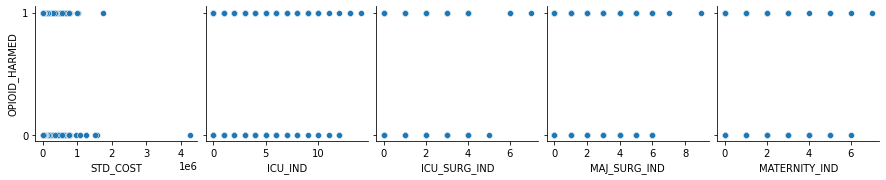

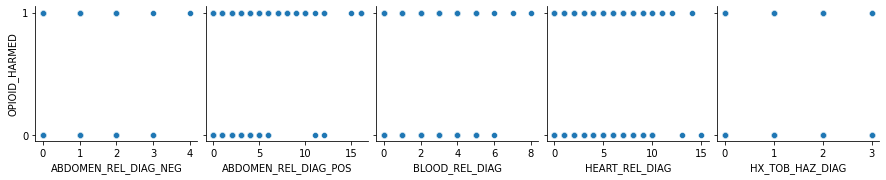

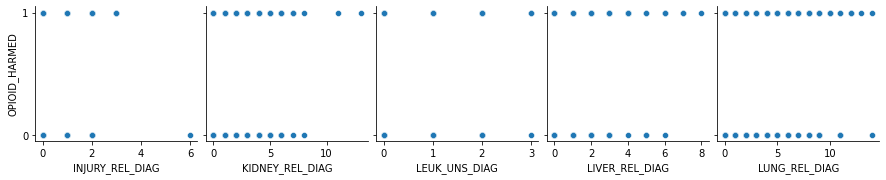

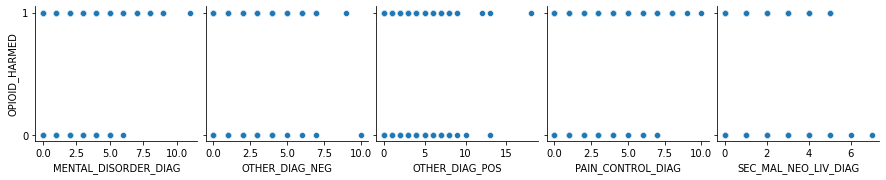

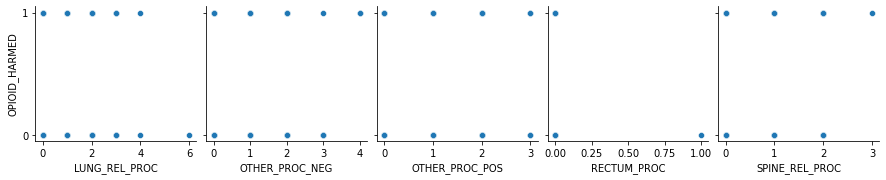

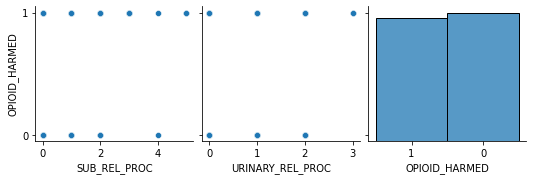

In [22]:
# Pair plots

df1 = df.drop(columns = ['PATID', 'STATE'])

for i in range(0, len(df1.columns), 5):
    sns.pairplot(data=df1,
                x_vars=df1.columns[i:i+5],
                y_vars=['OPIOID_HARMED'])

In [23]:
num_cols

['AGE',
 'LOS',
 'STD_COST',
 'ICU_IND',
 'ICU_SURG_IND',
 'MAJ_SURG_IND',
 'MATERNITY_IND',
 'ABDOMEN_REL_DIAG_NEG',
 'ABDOMEN_REL_DIAG_POS',
 'BLOOD_REL_DIAG',
 'HEART_REL_DIAG',
 'HX_TOB_HAZ_DIAG',
 'INJURY_REL_DIAG',
 'KIDNEY_REL_DIAG',
 'LEUK_UNS_DIAG',
 'LIVER_REL_DIAG',
 'LUNG_REL_DIAG',
 'MENTAL_DISORDER_DIAG',
 'OTHER_DIAG_NEG',
 'OTHER_DIAG_POS',
 'PAIN_CONTROL_DIAG',
 'SEC_MAL_NEO_LIV_DIAG',
 'SPINE_REL_DIAG',
 'SUB_ABUSE_DIAG',
 'SUB_WITHDRAWAL_DIAG',
 'ABDOMEN_REL_PROC_NEG',
 'ABDOMEN_REL_PROC_POS',
 'BLOOD_REL_PROC',
 'BONE_REL_PROC',
 'BRAIN_REL_PROC',
 'HEART_REL_PROC_NEG',
 'HEART_REL_PROC_POS',
 'LUNG_REL_PROC',
 'OTHER_PROC_NEG',
 'OTHER_PROC_POS',
 'RECTUM_PROC',
 'SPINE_REL_PROC',
 'SUB_REL_PROC',
 'URINARY_REL_PROC']

In [24]:
# Scaling the variables based on above dsitributions

# We see there is no normal distribution except age. normalize using minmaxscaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
num_cols1 = num_cols.copy()
num_cols1.remove('LOS')
num_cols1.remove('STD_COST')
num_cols1.remove('AGE')

df[num_cols1] = scaler.fit_transform(df[num_cols1])

In [25]:
# standardscaler for age, LOS, STD_COST

cols_to_norm = ['LOS','STD_COST','AGE']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [26]:
df[num_cols].describe()

AGE           LOS      STD_COST       ICU_IND  ICU_SURG_IND  \
count  7.701800e+04  7.701800e+04  7.701800e+04  77018.000000  77018.000000   
mean   1.003753e-16 -7.380537e-19 -1.070178e-16      0.023981      0.017497   
std    1.000006e+00  1.000006e+00  1.000006e+00      0.049517      0.052832   
min   -2.203024e+00 -3.983716e-01 -5.956387e-01      0.000000      0.000000   
25%   -7.676319e-01 -3.368447e-01 -4.051686e-01      0.000000      0.000000   
50%   -4.993578e-02 -2.753177e-01 -2.583478e-01      0.000000      0.000000   
75%    6.677603e-01 -2.920970e-02  4.455242e-02      0.071429      0.000000   
max    2.521809e+00  6.125167e+01  9.592972e+01      1.000000      1.000000   

       MAJ_SURG_IND  MATERNITY_IND  ABDOMEN_REL_DIAG_NEG  \
count  77018.000000   77018.000000          77018.000000   
mean       0.059715       0.018181              0.002538   
std        0.068297       0.052259              0.026815   
min        0.000000       0.000000              0.000000   
25%        0.000000       0.000000              0.000000   
50%        0.000000       0.000000              0.000000   
75%        0.111111       0.000000              0.000000   
max        1.000000       1.000000              1.000000   

       ABDOMEN_REL_DIAG_POS  BLOOD_REL_DIAG  ...  BRAIN_REL_PROC  \
count          77018.000000    77018.000000  ...    77018.000000   
mean               0.005209        0.011671  ...        0.001268   
std                0.025824        0.041968  ...        0.021415   
min                0.000000        0.000000  ...        0.000000   
25%                0.000000        0.000000  ...        0.000000   
50%                0.000000        0.000000  ...        0.000000   
75%                0.000000        0.000000  ...        0.000000   
max                1.000000        1.000000  ...        1.000000   

       HEART_REL_PROC_NEG  HEART_REL_PROC_POS  LUNG_REL_PROC  OTHER_PROC_NEG  \
count        77018.000000        77018.000000   77018.000000    77018.000000   
mean             0.001349            0.010133       0.002437        0.007407   
std              0.014782            0.048763       0.021566        0.044007   
min              0.000000            0.000000       0.000000        0.000000   
25%              0.000000            0.000000       0.000000        0.000000   
50%              0.000000            0.000000       0.000000        0.000000   
75%              0.000000            0.000000       0.000000        0.000000   
max              1.000000            1.000000       1.000000        1.000000   

       OTHER_PROC_POS   RECTUM_PROC  SPINE_REL_PROC  SUB_REL_PROC  \
count    77018.000000  77018.000000    77018.000000  77018.000000   
mean         0.013265      0.000013        0.012408      0.002747   
std          0.067466      0.003603        0.064574      0.025999   
min          0.000000      0.000000        0.000000      0.000000   
25%          0.000000      0.000000        0.000000      0.000000   
50%          0.000000      0.000000        0.000000      0.000000   
75%          0.000000      0.000000        0.000000      0.000000   
max          1.000000      1.000000        1.000000      1.000000   

       URINARY_REL_PROC  
count      77018.000000  
mean           0.004250  
std            0.038651  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  

[8 rows x 39 columns]

## Categorical plots

In [27]:
cat_cols

['GDR_CD', 'RACE', 'STATE', 'OPIOID_HARMED']

<AxesSubplot:xlabel='GDR_CD', ylabel='count'>

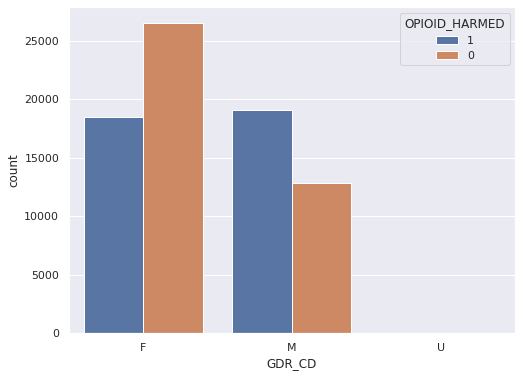

In [28]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x = 'GDR_CD',
              hue = 'OPIOID_HARMED',
              data = df,
              order = df['GDR_CD'].value_counts().index)
plt.show()

<AxesSubplot:xlabel='RACE', ylabel='count'>

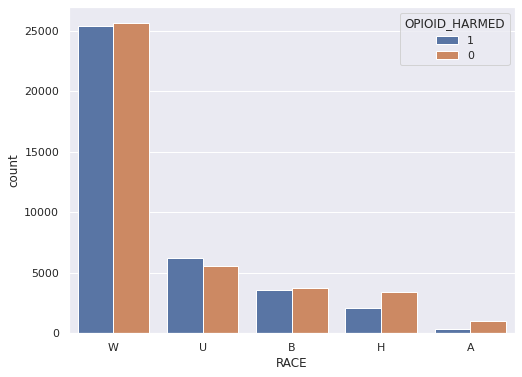

In [29]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x = 'RACE',
              hue = 'OPIOID_HARMED',
              data = df,
              order = df['RACE'].value_counts().index)
plt.show()

<AxesSubplot:xlabel='REGION', ylabel='count'>

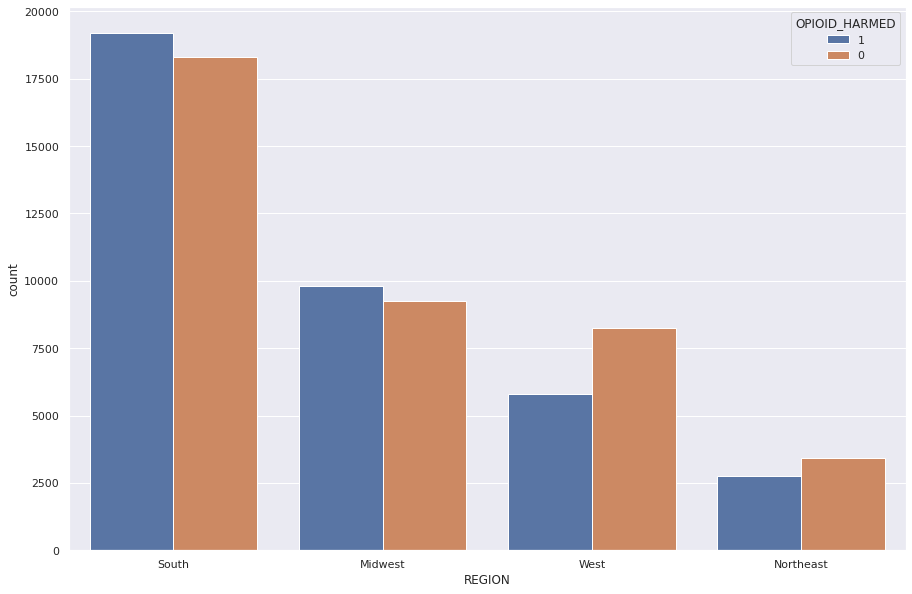

In [30]:
state_to_region = {
    'AL': 'South',
    'AK': 'West',
    'AZ': 'West',
    'AR': 'South',
    'CA': 'West',
    'CO': 'West',
    'CT': 'Northeast',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'HI': 'West',
    'ID': 'West',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'IA': 'Midwest',
    'KS': 'Midwest',
    'KY': 'South',
    'LA': 'South',
    'ME': 'Northeast',
    'MD': 'South',
    'MA': 'Northeast',
    'MI': 'Midwest',
    'MN': 'Midwest',
    'MS': 'South',
    'MO': 'Midwest',
    'MT': 'West',
    'NE': 'Midwest',
    'NV': 'West',
    'NH': 'Northeast',
    'NJ': 'Northeast',
    'NM': 'West',
    'NY': 'Northeast',
    'NC': 'South',
    'ND': 'Midwest',
    'OH': 'Midwest',
    'OK': 'South',
    'OR': 'West',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'SC': 'South',
    'SD': 'Midwest',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VT': 'Northeast',
    'VA': 'South',
    'WA': 'West',
    'WV': 'South',
    'WI': 'Midwest',
    'WY': 'West'
}

# Map the state codes to regions using the state_to_region dictionary
df['REGION'] = df['STATE'].map(state_to_region)

sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x = 'REGION',
              hue = 'OPIOID_HARMED',
              data = df,
              order = df['REGION'].value_counts().index)
plt.show()

In [31]:
cat_cols = list(df.select_dtypes(exclude=[np.number]).columns)
cat_cols.remove('STATE')
# cat_cols.remove('RECTUM_PROC')
cat_cols.remove('OPIOID_HARMED')
cat_cols

['GDR_CD', 'RACE', 'OPIOID_HARMED', 'REGION']

# Checking for correlation

In [32]:
X_variables = df[num_cols + cat_cols]
X_variables.shape
X_variables.head()

(77018, 43)

AGE       LOS  STD_COST   ICU_IND  ICU_SURG_IND  MAJ_SURG_IND  \
0  0.368720 -0.398372 -0.451991  0.071429           0.0      0.000000   
1  0.966800 -0.090737 -0.379493  0.000000           0.0      0.000000   
2 -0.588208 -0.336845 -0.484531  0.000000           0.0      0.000000   
3  0.847184 -0.275318  0.051787  0.000000           0.0      0.111111   
4  0.129488 -0.152264 -0.474391  0.000000           0.0      0.111111   

   MATERNITY_IND  ABDOMEN_REL_DIAG_NEG  ABDOMEN_REL_DIAG_POS  BLOOD_REL_DIAG  \
0            0.0                   0.0                   0.0             0.0   
1            0.0                   0.0                   0.0             0.0   
2            0.0                   0.0                   0.0             0.0   
3            0.0                   0.0                   0.0             0.0   
4            0.0                   0.0                   0.0             0.0   

   ...  OTHER_PROC_NEG  OTHER_PROC_POS  RECTUM_PROC  SPINE_REL_PROC  \
0  ...             0.0             0.0          0.0             0.0   
1  ...             0.0             0.0          0.0             0.0   
2  ...             0.0             0.0          0.0             0.0   
3  ...             0.0             0.0          0.0             0.0   
4  ...             0.0             0.0          0.0             0.0   

   SUB_REL_PROC  URINARY_REL_PROC  GDR_CD  RACE  OPIOID_HARMED   REGION  
0           0.0          0.000000       M     W              1  Midwest  
1           0.0          0.000000       F     W              1     West  
2           0.0          0.000000       F     W              1     West  
3           0.0          0.000000       F     W              1     West  
4           0.0          0.333333       M     W              1  Midwest  

[5 rows x 43 columns]

In [33]:
X_encoded = pd.get_dummies(X_variables, columns = ['GDR_CD', 'RACE', 'REGION'], dtype = float)
X_encoded.head()

AGE       LOS  STD_COST   ICU_IND  ICU_SURG_IND  MAJ_SURG_IND  \
0  0.368720 -0.398372 -0.451991  0.071429           0.0      0.000000   
1  0.966800 -0.090737 -0.379493  0.000000           0.0      0.000000   
2 -0.588208 -0.336845 -0.484531  0.000000           0.0      0.000000   
3  0.847184 -0.275318  0.051787  0.000000           0.0      0.111111   
4  0.129488 -0.152264 -0.474391  0.000000           0.0      0.111111   

   MATERNITY_IND  ABDOMEN_REL_DIAG_NEG  ABDOMEN_REL_DIAG_POS  BLOOD_REL_DIAG  \
0            0.0                   0.0                   0.0             0.0   
1            0.0                   0.0                   0.0             0.0   
2            0.0                   0.0                   0.0             0.0   
3            0.0                   0.0                   0.0             0.0   
4            0.0                   0.0                   0.0             0.0   

   ...  GDR_CD_U  RACE_A  RACE_B  RACE_H  RACE_U  RACE_W  REGION_Midwest  \
0  ...       0.0     0.0     0.0     0.0     0.0     1.0             1.0   
1  ...       0.0     0.0     0.0     0.0     0.0     1.0             0.0   
2  ...       0.0     0.0     0.0     0.0     0.0     1.0             0.0   
3  ...       0.0     0.0     0.0     0.0     0.0     1.0             0.0   
4  ...       0.0     0.0     0.0     0.0     0.0     1.0             1.0   

   REGION_Northeast  REGION_South  REGION_West  
0               0.0           0.0          0.0  
1               0.0           0.0          1.0  
2               0.0           0.0          1.0  
3               0.0           0.0          1.0  
4               0.0           0.0          0.0  

[5 rows x 52 columns]

In [34]:
#correlation matrix
corrmat = X_variables.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [35]:
# Calculate VIF for each variable

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Variable'] = num_cols
vif['VIF'] = [variance_inflation_factor(X_variables[num_cols].values, i) for i in range(X_variables[num_cols].shape[1])]

vif.sort_values(by = 'VIF', ascending = False)


Variable       VIF
3                ICU_IND  2.569559
4           ICU_SURG_IND  2.346674
5           MAJ_SURG_IND  2.131943
36        SPINE_REL_PROC  1.671360
22        SPINE_REL_DIAG  1.560411
1                    LOS  1.510494
19        OTHER_DIAG_POS  1.499635
2               STD_COST  1.461994
10        HEART_REL_DIAG  1.427139
24   SUB_WITHDRAWAL_DIAG  1.349501
0                    AGE  1.349295
23        SUB_ABUSE_DIAG  1.342629
17  MENTAL_DISORDER_DIAG  1.290671
16         LUNG_REL_DIAG  1.281786
31    HEART_REL_PROC_POS  1.272516
6          MATERNITY_IND  1.253664
37          SUB_REL_PROC  1.241483
20     PAIN_CONTROL_DIAG  1.233688
13       KIDNEY_REL_DIAG  1.217365
9         BLOOD_REL_DIAG  1.200115
27        BLOOD_REL_PROC  1.128602
34        OTHER_PROC_POS  1.115590
18        OTHER_DIAG_NEG  1.112315
8   ABDOMEN_REL_DIAG_POS  1.111756
28         BONE_REL_PROC  1.100115
33        OTHER_PROC_NEG  1.096405
32         LUNG_REL_PROC  1.068908
25  ABDOMEN_REL_PROC_NEG  1.058354
30    HEART_REL_PROC_NEG  1.055621
26  ABDOMEN_REL_PROC_POS  1.048829
7   ABDOMEN_REL_DIAG_NEG  1.044754
38      URINARY_REL_PROC  1.039422
12       INJURY_REL_DIAG  1.036315
15        LIVER_REL_DIAG  1.031916
11       HX_TOB_HAZ_DIAG  1.026027
21  SEC_MAL_NEO_LIV_DIAG  1.016737
14         LEUK_UNS_DIAG  1.012224
29        BRAIN_REL_PROC  1.010053
35           RECTUM_PROC  1.002364

# Base model

In [36]:
# X_encoded = X_encoded.drop(columns = ['OPIOID_HARMED'])
# X_encoded.head()

AGE       LOS  STD_COST   ICU_IND  ICU_SURG_IND  MAJ_SURG_IND  \
0  0.368720 -0.398372 -0.451991  0.071429           0.0      0.000000   
1  0.966800 -0.090737 -0.379493  0.000000           0.0      0.000000   
2 -0.588208 -0.336845 -0.484531  0.000000           0.0      0.000000   
3  0.847184 -0.275318  0.051787  0.000000           0.0      0.111111   
4  0.129488 -0.152264 -0.474391  0.000000           0.0      0.111111   

   MATERNITY_IND  ABDOMEN_REL_DIAG_NEG  ABDOMEN_REL_DIAG_POS  BLOOD_REL_DIAG  \
0            0.0                   0.0                   0.0             0.0   
1            0.0                   0.0                   0.0             0.0   
2            0.0                   0.0                   0.0             0.0   
3            0.0                   0.0                   0.0             0.0   
4            0.0                   0.0                   0.0             0.0   

   ...  GDR_CD_U  RACE_A  RACE_B  RACE_H  RACE_U  RACE_W  REGION_Midwest  \
0  ...       0.0     0.0     0.0     0.0     0.0     1.0             1.0   
1  ...       0.0     0.0     0.0     0.0     0.0     1.0             0.0   
2  ...       0.0     0.0     0.0     0.0     0.0     1.0             0.0   
3  ...       0.0     0.0     0.0     0.0     0.0     1.0             0.0   
4  ...       0.0     0.0     0.0     0.0     0.0     1.0             1.0   

   REGION_Northeast  REGION_South  REGION_West  
0               0.0           0.0          0.0  
1               0.0           0.0          1.0  
2               0.0           0.0          1.0  
3               0.0           0.0          1.0  
4               0.0           0.0          0.0  

[5 rows x 51 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X = X_encoded
y = df['OPIOID_HARMED']
y = y.to_numpy()

## Logistic regression models

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 0, stratify=y)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [41]:
# ridge
ridge = LogisticRegression(penalty='l2')
ridge.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Make prediction
lasso_prediction = lr.predict(X_val)
# Get predicted probability
lasso_pred_Prob = lr.predict_proba(X_val)[:,1]

In [43]:
# Make prediction
ridge_prediction = ridge.predict(X_val)
# Get predicted probability
ridge_pred_Prob = ridge.predict_proba(X_val)[:,1]

0.7885594112054111


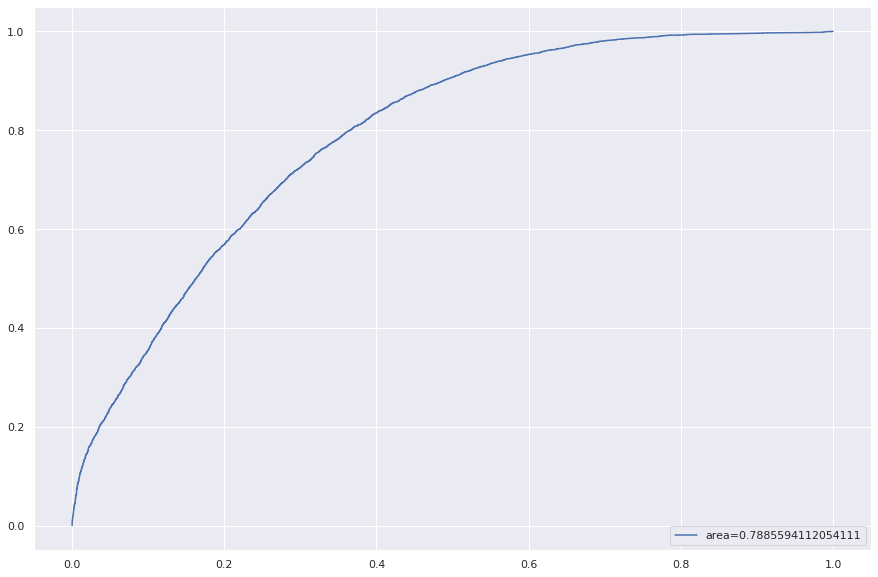

In [48]:
from sklearn.metrics import plot_confusion_matrix, classification_report, log_loss, roc_curve, roc_auc_score
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_val,lasso_pred_Prob, pos_label='1')
# Get auc value
auc = roc_auc_score(y_val,lasso_pred_Prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

In [49]:
from sklearn.metrics import plot_confusion_matrix, classification_report, log_loss, roc_curve, roc_auc_score
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_val,ridge_pred_Prob, pos_label='1')
# Get auc value
auc = roc_auc_score(y_val,ridge_pred_Prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

0.7868901446347961


In [51]:
# Run model
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5).fit(X_train, y_train)
# Make prediction
elasticNet_prediction = elasticNet.predict(X_val)
# Get predicted probability
elasticNet_pred_Prob = elasticNet.predict_proba(X_val)[:,1]
# Get the false positive rate and true positive rate
fpr,tpr, _ = roc_curve(y_val,elasticNet_pred_Prob, pos_label='1')
# Get auc value
auc = roc_auc_score(y_val,elasticNet_pred_Prob)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

In [52]:
# Calculate log loss
log_loss(y_val,elasticNet_pred_Prob), log_loss(y_val,ridge_pred_Prob), log_loss(y_val, lasso_pred_Prob)

(0.5949802687774574, 0.5504826184715782, 0.5490766090195676)

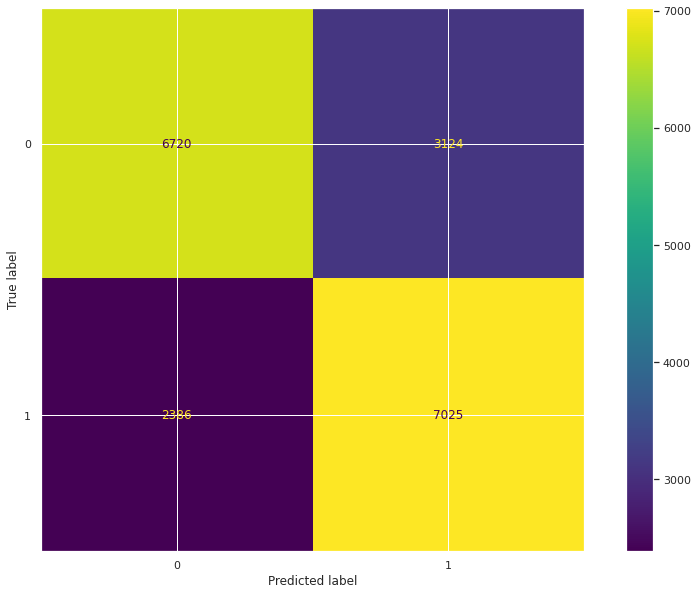

In [53]:
plot_confusion_matrix(lr, X_val,y_val)

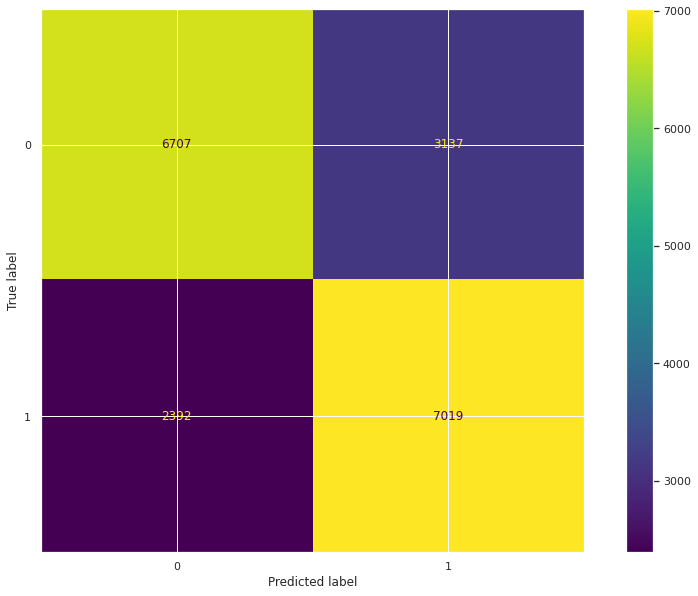

In [54]:
plot_confusion_matrix(ridge, X_val,y_val)

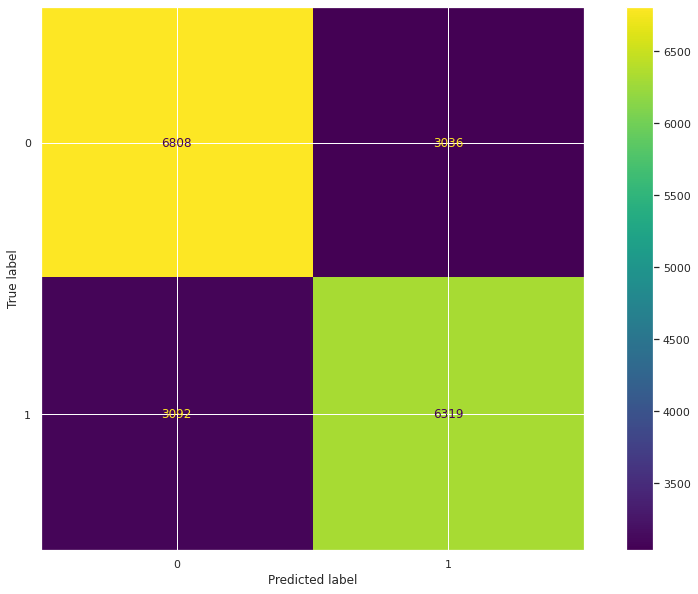

In [55]:
# Confusion matrix
plot_confusion_matrix(elasticNet, X_val, y_val)

In [56]:
print('lasso\n',classification_report(y_val, lasso_prediction, digits=3))
print('ridge\n',classification_report(y_val, ridge_prediction, digits=3))
print('elastic\n',classification_report(y_val, elasticNet_prediction, digits=3))

lasso
               precision    recall  f1-score   support

           0      0.738     0.683     0.709      9844
           1      0.692     0.746     0.718      9411

    accuracy                          0.714     19255
   macro avg      0.715     0.715     0.714     19255
weighted avg      0.716     0.714     0.714     19255

ridge
               precision    recall  f1-score   support

           0      0.737     0.681     0.708      9844
           1      0.691     0.746     0.717      9411

    accuracy                          0.713     19255
   macro avg      0.714     0.714     0.713     19255
weighted avg      0.715     0.713     0.713     19255

elastic
               precision    recall  f1-score   support

           0      0.688     0.692     0.690      9844
           1      0.675     0.671     0.673      9411

    accuracy                          0.682     19255
   macro avg      0.682     0.682     0.682     19255
weighted avg      0.682     0.682     0.682     192

In [57]:
# Model coefficients
lassoCoeff = pd.concat([pd.DataFrame(X_val.columns),
                       pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
lassoCoeff.columns=['Variable','Coefficient']
lassoCoeff['Coefficient_Abs']=lassoCoeff['Coefficient'].apply(abs)
lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False)

Variable  Coefficient  Coefficient_Abs
6          MATERNITY_IND   -24.032759        24.032759
24   SUB_WITHDRAWAL_DIAG    12.903199        12.903199
23        SUB_ABUSE_DIAG    11.186943        11.186943
16         LUNG_REL_DIAG     8.196449         8.196449
17  MENTAL_DISORDER_DIAG     6.235801         6.235801
37          SUB_REL_PROC     5.896559         5.896559
10        HEART_REL_DIAG    -5.349225         5.349225
27        BLOOD_REL_PROC    -4.981300         4.981300
19        OTHER_DIAG_POS    -4.278225         4.278225
15        LIVER_REL_DIAG     3.898085         3.898085
13       KIDNEY_REL_DIAG    -3.330903         3.330903
8   ABDOMEN_REL_DIAG_POS     3.236448         3.236448
20     PAIN_CONTROL_DIAG     3.216377         3.216377
12       INJURY_REL_DIAG     3.111436         3.111436
3                ICU_IND     2.834879         2.834879
18        OTHER_DIAG_NEG     2.746674         2.746674
11       HX_TOB_HAZ_DIAG    -2.438800         2.438800
30    HEART_REL_PROC_NEG    -2.393752         2.393752
9         BLOOD_REL_DIAG    -1.820409         1.820409
25  ABDOMEN_REL_PROC_NEG    -1.668273         1.668273
31    HEART_REL_PROC_POS     1.488617         1.488617
7   ABDOMEN_REL_DIAG_NEG    -1.428786         1.428786
22        SPINE_REL_DIAG     1.292778         1.292778
38      URINARY_REL_PROC    -1.178101         1.178101
5           MAJ_SURG_IND     0.801773         0.801773
32         LUNG_REL_PROC    -0.730404         0.730404
4           ICU_SURG_IND    -0.650214         0.650214
34        OTHER_PROC_POS     0.642373         0.642373
42                RACE_A    -0.606853         0.606853
0                    AGE    -0.503745         0.503745
14         LEUK_UNS_DIAG     0.491539         0.491539
33        OTHER_PROC_NEG     0.399978         0.399978
44                RACE_H    -0.387844         0.387844
26  ABDOMEN_REL_PROC_POS     0.373063         0.373063
39              GDR_CD_F    -0.299229         0.299229
36        SPINE_REL_PROC    -0.218491         0.218491
49          REGION_South     0.204838         0.204838
29        BRAIN_REL_PROC     0.171750         0.171750
21  SEC_MAL_NEO_LIV_DIAG    -0.162784         0.162784
47        REGION_Midwest     0.158601         0.158601
28         BONE_REL_PROC     0.114963         0.114963
40              GDR_CD_M     0.113038         0.113038
45                RACE_U     0.096687         0.096687
48      REGION_Northeast    -0.088154         0.088154
1                    LOS    -0.050088         0.050088
50           REGION_West    -0.026289         0.026289
2               STD_COST     0.014309         0.014309
46                RACE_W     0.001932         0.001932
43                RACE_B    -0.000277         0.000277
41              GDR_CD_U     0.000000         0.000000
35           RECTUM_PROC     0.000000         0.000000

<BarContainer object of 51 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

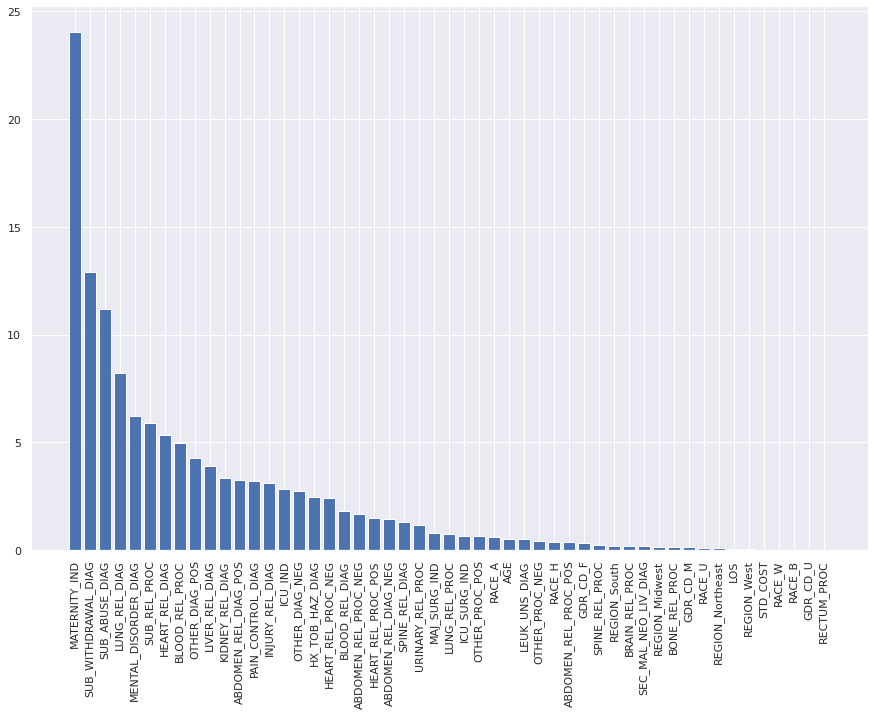

In [58]:
# plt.bar(lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False))
lfbar = lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False).reset_index(drop=True)
plt.bar(lfbar.Variable, lfbar.Coefficient_Abs)
plt.xticks(rotation='vertical')

In [59]:
# Model coefficients
ridgeCoeff = pd.concat([pd.DataFrame(X_val.columns),
                       pd.DataFrame(np.transpose(ridge.coef_))], axis = 1)
ridgeCoeff.columns=['Variable','Coefficient']
ridgeCoeff['Coefficient_Abs']=ridgeCoeff['Coefficient'].apply(abs)
ridgeCoeff.sort_values(by='Coefficient_Abs', ascending=False)

Variable  Coefficient  Coefficient_Abs
6          MATERNITY_IND   -20.792719        20.792719
24   SUB_WITHDRAWAL_DIAG     8.349738         8.349738
23        SUB_ABUSE_DIAG     7.728281         7.728281
16         LUNG_REL_DIAG     7.298063         7.298063
17  MENTAL_DISORDER_DIAG     6.092373         6.092373
10        HEART_REL_DIAG    -4.820000         4.820000
37          SUB_REL_PROC     4.471045         4.471045
19        OTHER_DIAG_POS    -3.805911         3.805911
27        BLOOD_REL_PROC    -3.414414         3.414414
20     PAIN_CONTROL_DIAG     3.169139         3.169139
15        LIVER_REL_DIAG     3.121337         3.121337
8   ABDOMEN_REL_DIAG_POS     3.042627         3.042627
13       KIDNEY_REL_DIAG    -2.965150         2.965150
3                ICU_IND     2.787156         2.787156
12       INJURY_REL_DIAG     2.708696         2.708696
18        OTHER_DIAG_NEG     2.597022         2.597022
11       HX_TOB_HAZ_DIAG    -2.240963         2.240963
30    HEART_REL_PROC_NEG    -1.818918         1.818918
9         BLOOD_REL_DIAG    -1.781542         1.781542
25  ABDOMEN_REL_PROC_NEG    -1.469807         1.469807
31    HEART_REL_PROC_POS     1.436428         1.436428
22        SPINE_REL_DIAG     1.393847         1.393847
7   ABDOMEN_REL_DIAG_NEG    -1.363364         1.363364
38      URINARY_REL_PROC    -1.095588         1.095588
34        OTHER_PROC_POS     0.687679         0.687679
32         LUNG_REL_PROC    -0.648624         0.648624
4           ICU_SURG_IND    -0.635915         0.635915
5           MAJ_SURG_IND     0.520814         0.520814
14         LEUK_UNS_DIAG     0.499874         0.499874
33        OTHER_PROC_NEG     0.492885         0.492885
0                    AGE    -0.486892         0.486892
26  ABDOMEN_REL_PROC_POS     0.456707         0.456707
42                RACE_A    -0.427325         0.427325
21  SEC_MAL_NEO_LIV_DIAG    -0.424306         0.424306
29        BRAIN_REL_PROC     0.297986         0.297986
44                RACE_H    -0.265613         0.265613
39              GDR_CD_F    -0.239509         0.239509
45                RACE_U     0.234712         0.234712
28         BONE_REL_PROC     0.219139         0.219139
49          REGION_South     0.218829         0.218829
40              GDR_CD_M     0.197969         0.197969
47        REGION_Midwest     0.171431         0.171431
35           RECTUM_PROC    -0.149696         0.149696
46                RACE_W     0.146059         0.146059
43                RACE_B     0.146009         0.146009
41              GDR_CD_U    -0.124618         0.124618
36        SPINE_REL_PROC    -0.105363         0.105363
48      REGION_Northeast    -0.062358         0.062358
1                    LOS    -0.050234         0.050234
2               STD_COST     0.015037         0.015037
50           REGION_West    -0.010248         0.010248

In [60]:
# Model coefficients
elasticNetCoeff = pd.concat([pd.DataFrame(X_val.columns),
                             pd.DataFrame(np.transpose(elasticNet.coef_))], axis = 1)
elasticNetCoeff.columns=['Variable','Coefficient']
elasticNetCoeff['Coefficient_Abs']=elasticNetCoeff['Coefficient'].apply(abs)
elasticNetCoeff.sort_values(by='Coefficient_Abs', ascending=False)

Variable  Coefficient  Coefficient_Abs
6          MATERNITY_IND    -6.709657         6.709657
17  MENTAL_DISORDER_DIAG     3.538395         3.538395
16         LUNG_REL_DIAG     1.885971         1.885971
20     PAIN_CONTROL_DIAG     1.821637         1.821637
24   SUB_WITHDRAWAL_DIAG     1.438709         1.438709
23        SUB_ABUSE_DIAG     1.360690         1.360690
3                ICU_IND     1.185135         1.185135
18        OTHER_DIAG_NEG     1.036328         1.036328
22        SPINE_REL_DIAG     1.019629         1.019629
10        HEART_REL_DIAG    -1.010852         1.010852
37          SUB_REL_PROC     0.925701         0.925701
9         BLOOD_REL_DIAG    -0.792703         0.792703
34        OTHER_PROC_POS     0.746091         0.746091
8   ABDOMEN_REL_DIAG_POS     0.745273         0.745273
31    HEART_REL_PROC_POS     0.735988         0.735988
11       HX_TOB_HAZ_DIAG    -0.720116         0.720116
19        OTHER_DIAG_POS    -0.647985         0.647985
5           MAJ_SURG_IND    -0.633792         0.633792
42                RACE_A    -0.622464         0.622464
13       KIDNEY_REL_DIAG    -0.571794         0.571794
15        LIVER_REL_DIAG     0.475254         0.475254
36        SPINE_REL_PROC     0.438366         0.438366
12       INJURY_REL_DIAG     0.434412         0.434412
25  ABDOMEN_REL_PROC_NEG    -0.433641         0.433641
27        BLOOD_REL_PROC    -0.392160         0.392160
39              GDR_CD_F    -0.391254         0.391254
38      URINARY_REL_PROC    -0.379789         0.379789
0                    AGE    -0.353825         0.353825
45                RACE_U     0.284472         0.284472
14         LEUK_UNS_DIAG     0.273728         0.273728
4           ICU_SURG_IND     0.272439         0.272439
28         BONE_REL_PROC     0.254692         0.254692
40              GDR_CD_M     0.251899         0.251899
44                RACE_H    -0.212778         0.212778
46                RACE_W     0.211413         0.211413
26  ABDOMEN_REL_PROC_POS     0.207391         0.207391
30    HEART_REL_PROC_NEG    -0.196088         0.196088
43                RACE_B     0.182043         0.182043
7   ABDOMEN_REL_DIAG_NEG    -0.170615         0.170615
50           REGION_West    -0.138574         0.138574
48      REGION_Northeast    -0.130972         0.130972
21  SEC_MAL_NEO_LIV_DIAG    -0.130345         0.130345
49          REGION_South     0.123699         0.123699
47        REGION_Midwest     0.087828         0.087828
29        BRAIN_REL_PROC     0.083934         0.083934
33        OTHER_PROC_NEG     0.059944         0.059944
1                    LOS    -0.041171         0.041171
32         LUNG_REL_PROC     0.037446         0.037446
2               STD_COST     0.031379         0.031379
35           RECTUM_PROC    -0.001532         0.001532
41              GDR_CD_U     0.000000         0.000000

In [61]:
# example of grid searching key hyperparameters for LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2', 'elasticnet']

grid = dict(C=C, penalty=penalty, solver=['saga','liblinear','lbfgs'], l1_ratio = [0.25,0.5,0.75])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: 

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: 

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-pack

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/pytho

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476:

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/pytho

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opti

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:/

Best: 0.790598 using {'C': 1000, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
0.614387 (0.005844) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'saga'}
0.614387 (0.005845) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'lbfgs'}
0.653486 (0.005552) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l2', 'solver': 'saga'}
0.653340 (0.005562) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l2', 'solver': 'liblinear'}
0.653489 (0.005553) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'l2', 'solver': 'lbfgs'}
0.635880 (0.005848) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'l1_ratio': 0.25, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.614387 (0.005844) with: {'C': 0.001, 

In [117]:
# gridsearchcv for best parameters
# {'C': 1000, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
lr = LogisticRegression(C= 1000, l1_ratio = 0.25, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=1000, l1_ratio=0.25, penalty='l1', solver='liblinear')

In [118]:
y_pred = lr.predict(X_val)

In [129]:
# y_val = y_val.to_numpy()

In [120]:
print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.738     0.684     0.710      9844
           1      0.693     0.747     0.719      9411

    accuracy                          0.714     19255
   macro avg      0.716     0.715     0.714     19255
weighted avg      0.716     0.714     0.714     19255



array([[6730, 3114],
       [2384, 7027]])

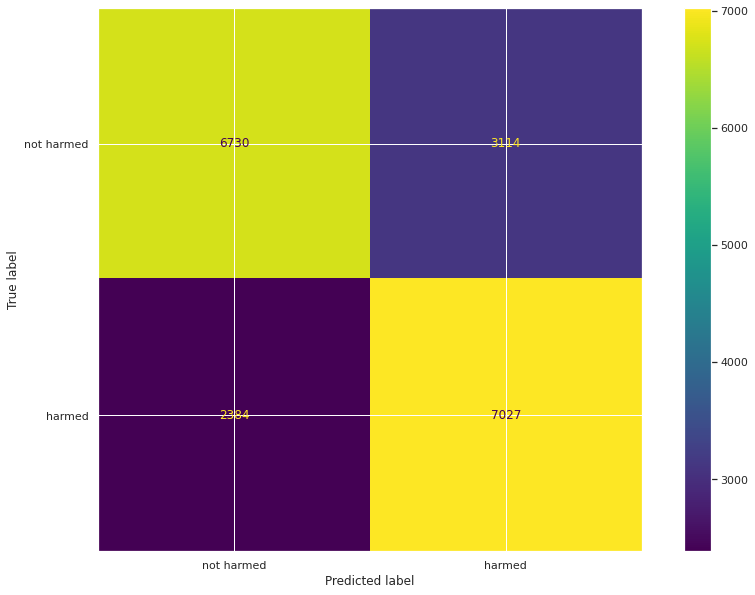

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve,plot_confusion_matrix
cm = confusion_matrix(y_val,y_pred)
# p_score, r_score, roc = [x(y_val,y_pred, pos_label='1') for x in [precision_score, recall_score,roc_auc_score]]
# print(cm)
# print(roc)
# print('score is:',score)
# print(report)
# # print(roc)
cm
plot_confusion_matrix(lr, X_val,y_val, values_format = 'd', display_labels=['not harmed', 'harmed'])

0.7888130006078028


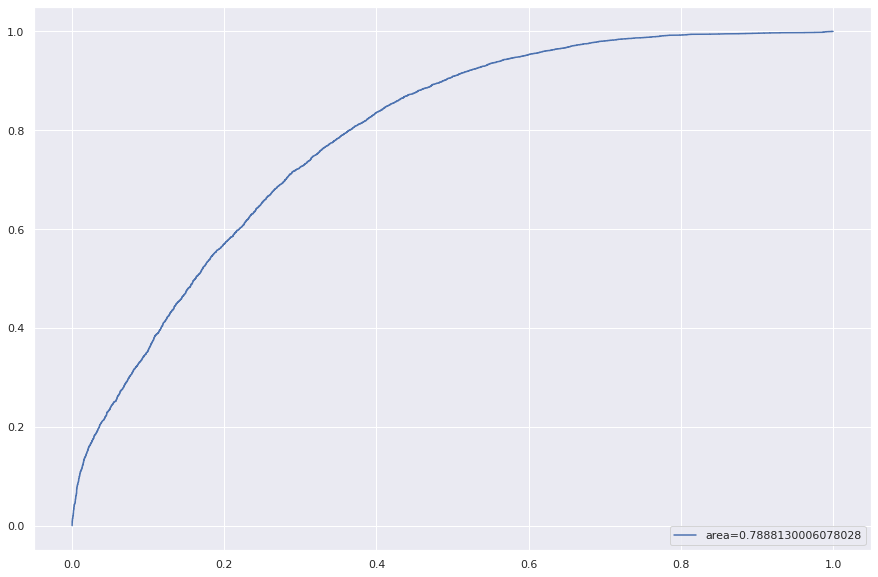

In [122]:
y_prob = lr.predict_proba(X_val)[:,1]
# roc_curve(y_val, y_prob)
fpr,tpr, _= roc_curve(y_val,y_prob, pos_label='1')
# Get auc value
auc = roc_auc_score(y_val,y_prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

In [123]:
# Model coefficients
lrCoeff = pd.concat([pd.DataFrame(X_val.columns),
                       pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
lrCoeff.columns=['Variable','Coefficient']
lrCoeff['Coefficient_Abs']=lrCoeff['Coefficient'].apply(abs)
lrCoeff.sort_values(by='Coefficient_Abs', ascending=False)

Variable  Coefficient  Coefficient_Abs
6          MATERNITY_IND   -24.205920        24.205920
24   SUB_WITHDRAWAL_DIAG    13.522056        13.522056
23        SUB_ABUSE_DIAG    11.656247        11.656247
16         LUNG_REL_DIAG     8.350486         8.350486
35           RECTUM_PROC    -6.792176         6.792176
37          SUB_REL_PROC     6.594601         6.594601
17  MENTAL_DISORDER_DIAG     6.260053         6.260053
10        HEART_REL_DIAG    -5.517037         5.517037
27        BLOOD_REL_PROC    -5.358728         5.358728
19        OTHER_DIAG_POS    -4.408737         4.408737
15        LIVER_REL_DIAG     4.296688         4.296688
13       KIDNEY_REL_DIAG    -3.531952         3.531952
8   ABDOMEN_REL_DIAG_POS     3.421656         3.421656
12       INJURY_REL_DIAG     3.335820         3.335820
20     PAIN_CONTROL_DIAG     3.250282         3.250282
3                ICU_IND     3.039840         3.039840
18        OTHER_DIAG_NEG     2.839919         2.839919
30    HEART_REL_PROC_NEG    -2.829036         2.829036
11       HX_TOB_HAZ_DIAG    -2.510988         2.510988
9         BLOOD_REL_DIAG    -1.860360         1.860360
25  ABDOMEN_REL_PROC_NEG    -1.725809         1.725809
7   ABDOMEN_REL_DIAG_NEG    -1.573472         1.573472
31    HEART_REL_PROC_POS     1.536347         1.536347
22        SPINE_REL_DIAG     1.336841         1.336841
38      URINARY_REL_PROC    -1.213994         1.213994
32         LUNG_REL_PROC    -0.960676         0.960676
5           MAJ_SURG_IND     0.903250         0.903250
4           ICU_SURG_IND    -0.808921         0.808921
42                RACE_A    -0.756151         0.756151
34        OTHER_PROC_POS     0.666669         0.666669
14         LEUK_UNS_DIAG     0.576698         0.576698
44                RACE_H    -0.533313         0.533313
0                    AGE    -0.503910         0.503910
41              GDR_CD_U    -0.484689         0.484689
33        OTHER_PROC_NEG     0.455066         0.455066
26  ABDOMEN_REL_PROC_POS     0.419262         0.419262
29        BRAIN_REL_PROC     0.353897         0.353897
21  SEC_MAL_NEO_LIV_DIAG    -0.332580         0.332580
39              GDR_CD_F    -0.301068         0.301068
36        SPINE_REL_PROC    -0.290940         0.290940
49          REGION_South     0.222192         0.222192
47        REGION_Midwest     0.175981         0.175981
28         BONE_REL_PROC     0.159251         0.159251
43                RACE_B    -0.143377         0.143377
46                RACE_W    -0.141932         0.141932
40              GDR_CD_M     0.111000         0.111000
48      REGION_Northeast    -0.072765         0.072765
1                    LOS    -0.049309         0.049309
45                RACE_U    -0.045579         0.045579
2               STD_COST     0.014836         0.014836
50           REGION_West    -0.010585         0.010585

<BarContainer object of 51 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

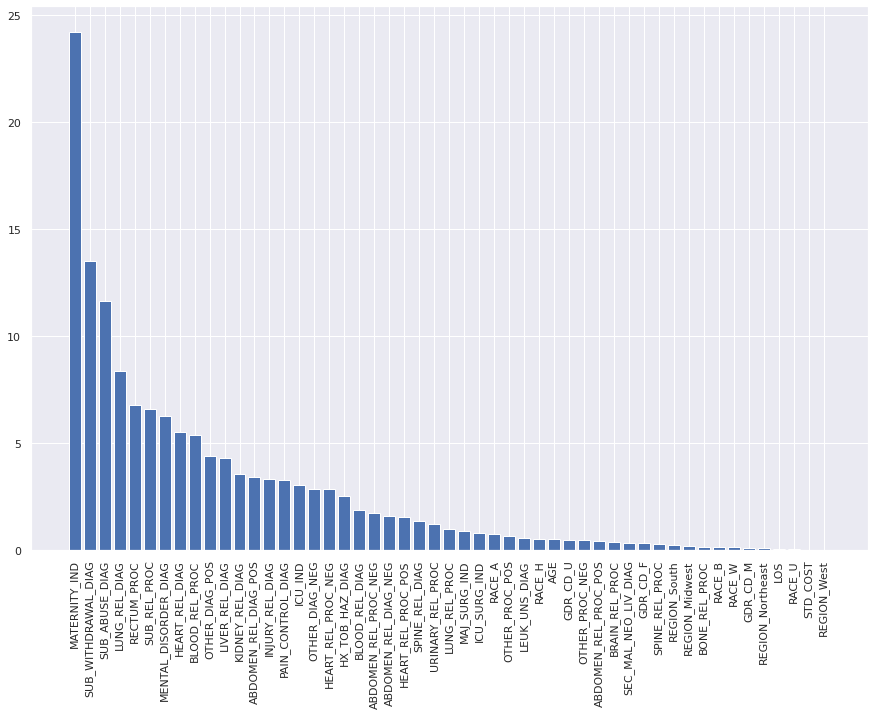

In [124]:
# plt.bar(lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False))
lfbar = lrCoeff.sort_values(by='Coefficient_Abs', ascending=False).reset_index(drop=True)
plt.bar(lfbar.Variable, lfbar.Coefficient_Abs)
plt.xticks(rotation='vertical')

In [125]:
X['RECTUM_PROC'].value_counts()

0.0    77017
1.0        1
Name: RECTUM_PROC, dtype: int64

## Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 6, max_features= 8, min_samples_leaf= 6, n_estimators= 120, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=8, min_samples_leaf=6,
                       n_estimators=120, oob_score=True)

receiving operating characteristic auc score: 0.6974847629394065
general accuracy: 0.6973773045962087
confusion matrix:
 [[6819 3025]
 [2802 6609]]
precision: 0.6860078887274237 recall: 0.7022633088938476 f1(harmonic mean): 0.6940404305592018


Text(0.5, 1.0, 'ROC curve:\nRandomForestClassifier(max_depth=6, max_features=8, min_samples_leaf=6,\n                       n_estimators=120, oob_score=True)')

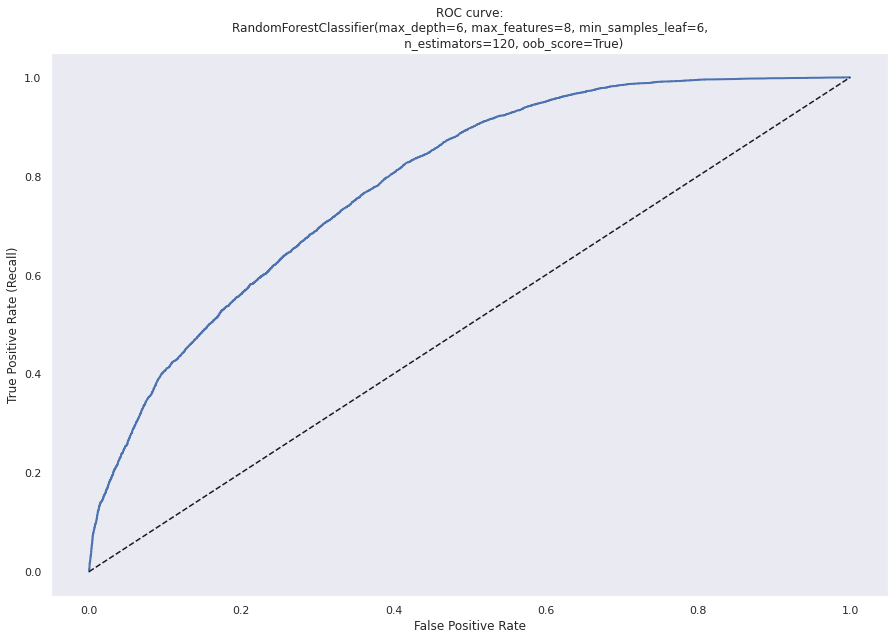

In [91]:
# from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score, brier_score_loss, \
    log_loss, roc_auc_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, median_absolute_error, r2_score
def plot_roc_curve(fpr,tpr, label):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
y_pred = rf.predict(X_val)
rocauc_temp = roc_auc_score(y_val, y_pred)
# score_temp = rf.score(X_test, y_pred)   
score_temp = accuracy_score(y_val, y_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, rf.predict_proba(X_val)[:,1], pos_label='1')
# auc_temp = auc(false_positive_rate, true_positive_rate)
# rf.score()
# print('area under the curve:',auc_temp)
print('receiving operating characteristic auc score:',rocauc_temp)
print('general accuracy:', score_temp)

cmatrix_temp = confusion_matrix(y_val, y_pred=y_pred)
print('confusion matrix:\n', cmatrix_temp)
prec_temp = precision_score(y_val, y_pred,  pos_label='1')
recall_temp = recall_score(y_val, y_pred, pos_label='1')
f1_temp = f1_score(y_val, y_pred,  pos_label='1')
print('precision:',prec_temp, 'recall:',recall_temp, 'f1(harmonic mean):',f1_temp)

plot_roc_curve(false_positive_rate, true_positive_rate, label = str(rf) + ', C-statistics= '+ str(rocauc_temp))
plt.title('ROC curve:\n'+str(rf))

In [93]:
y_prob = rf.predict_proba(X_val)[:,1]
# roc_curve(y_val, y_prob)
fpr,tpr, _= roc_curve(y_val,y_prob, pos_label='1')
# Get auc value
auc = roc_auc_score(y_val,y_prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

0.7854929364346692


In [128]:
y_val.shape

(19255,)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      9844
           1       0.69      0.70      0.69      9411

    accuracy                           0.70     19255
   macro avg       0.70      0.70      0.70     19255
weighted avg       0.70      0.70      0.70     19255
 
confusion_matrix:
 [[6819 3025]
 [2802 6609]]


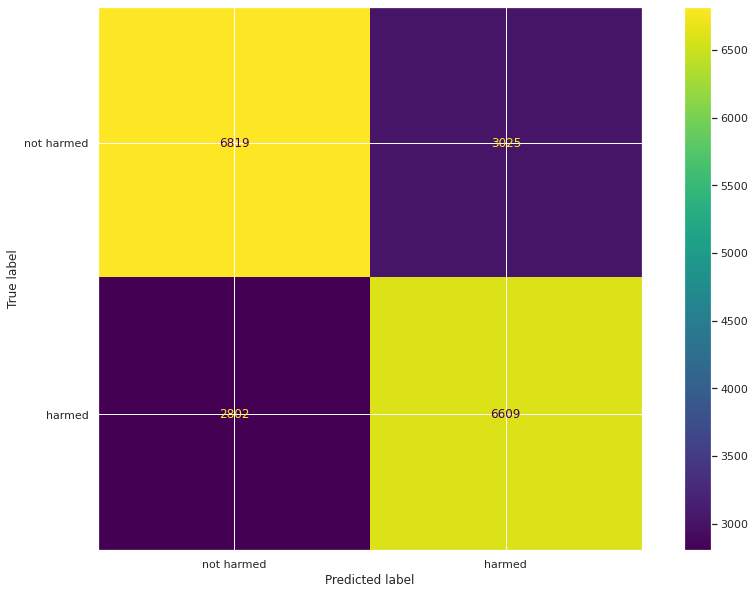

In [94]:
from sklearn.metrics import  precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(rf, X_val,y_val, values_format = 'd', display_labels=['not harmed', 'harmed'])
print(classification_report(y_val,rf.predict(X_val)),'\nconfusion_matrix:\n',confusion_matrix(y_val,rf.predict(X_val)))
# precision_score(y_val, xgb_prediction)


In [95]:
from sklearn.inspection import permutation_importance
def plot_perm(clf):
    train_result = permutation_importance(
        clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
    )
    test_results = permutation_importance(
        clf, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2
    )
    sorted_importances_idx = train_result.importances_mean.argsort()
    train_importances = pd.DataFrame(
        train_result.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    test_importances = pd.DataFrame(
        test_results.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    for name, importances in zip(["train", "test"], [train_importances, test_importances]):
        ax = importances.plot.box(vert=False, whis=10)
        ax.set_title(f"Permutation Importances ({name} set)")
        ax.set_xlabel("Decrease in accuracy score")
        ax.axvline(x=0, color="k", linestyle="--")
        ax.figure.tight_layout()


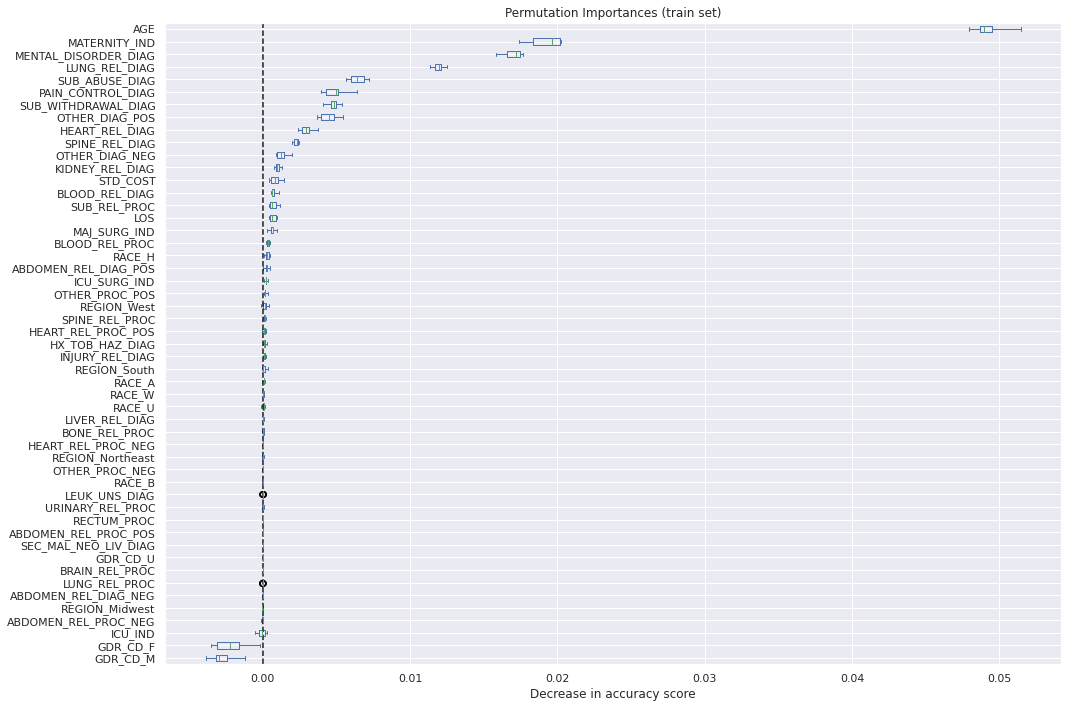

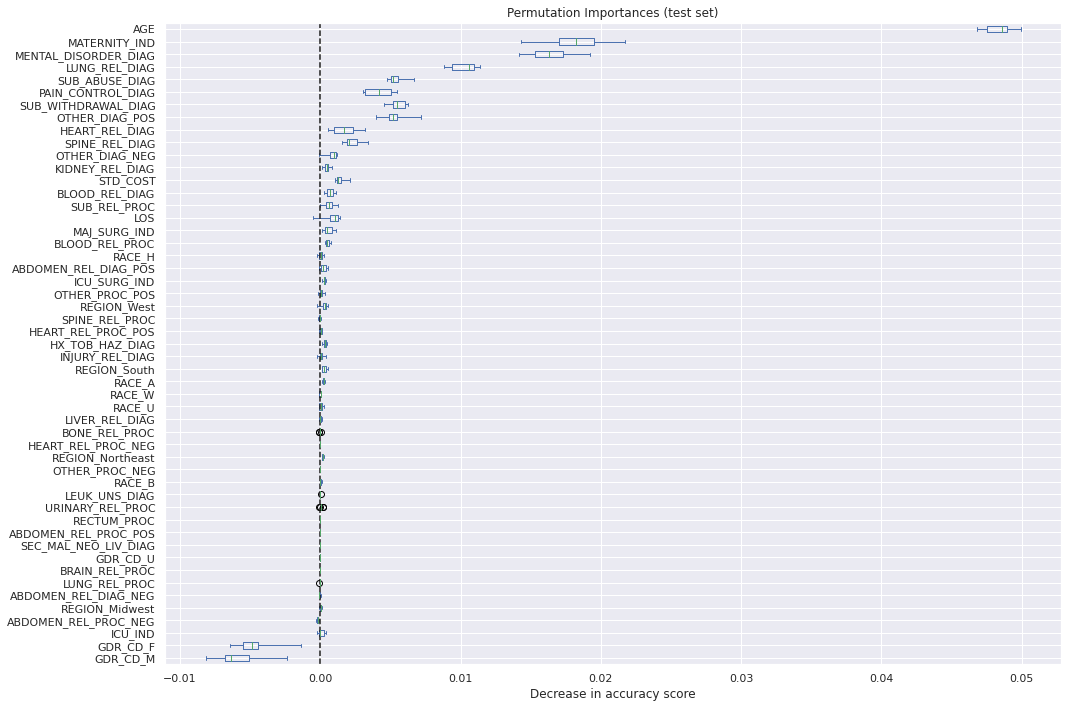

In [96]:
plot_perm(rf)

## XGBoost

In [97]:
from xgboost import XGBClassifier   

In [98]:
xgb = XGBClassifier(objective='binary:logistic', seed=42)
xgb.fit(X_train,y_train,
        early_stopping_rounds =10,
        eval_metric = 'aucpr',
        eval_set = [(X_val, y_val)])

[0]	validation_0-aucpr:0.672767
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.679564
[2]	validation_0-aucpr:0.69577
[3]	validation_0-aucpr:0.697061
[4]	validation_0-aucpr:0.70905
[5]	validation_0-aucpr:0.710138
[6]	validation_0-aucpr:0.71879
[7]	validation_0-aucpr:0.718359
[8]	validation_0-aucpr:0.719188
[9]	validation_0-aucpr:0.727795
[10]	validation_0-aucpr:0.728476
[11]	validation_0-aucpr:0.730887
[12]	validation_0-aucpr:0.736576
[13]	validation_0-aucpr:0.738047
[14]	validation_0-aucpr:0.741681
[15]	validation_0-aucpr:0.741668
[16]	validation_0-aucpr:0.743293
[17]	validation_0-aucpr:0.745025
[18]	validation_0-aucpr:0.747387
[19]	validation_0-aucpr:0.749017
[20]	validation_0-aucpr:0.750594
[21]	validation_0-aucpr:0.751188
[22]	validation_0-aucpr:0.752413
[23]	validation_0-aucpr:0.753222
[24]	validation_0-aucpr:0.754441
[25]	validation_0-aucpr:0.756529
[26]	validation_0-aucpr:0.757075
[27]	validation_0-aucpr:0.758172
[28]	validation_0-aucpr

XGBClassifier(seed=42)

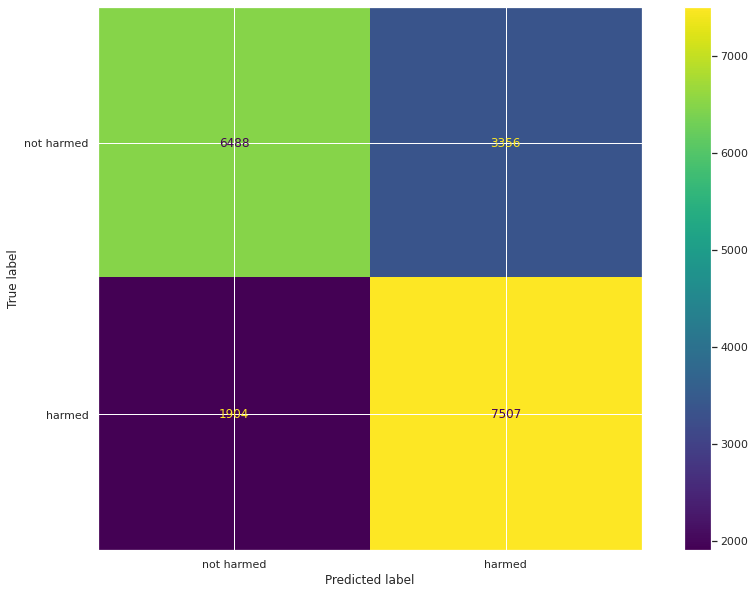

In [99]:
# conf matrix
plot_confusion_matrix(xgb, X_val,y_val, values_format = 'd', display_labels=['not harmed', 'harmed'])

In [101]:
# dset inmbalanced => scale_pos_weight helps with imbalanced data
# use gridsearch() 
# for precision
# r1
param_grid = {
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0.0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight': [1,2]
}
# {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 1.0, 'scale_pos_weight': 1}
# # r2
param_grid = {
    'gamma':[1.2,1.0,0.8],
    'learning_rate':[0.075,0.1,0.125],
    'max_depth':[2,3,4],
    'reg_lambda':[0.5,1,1.5],
    'scale_pos_weight': [1,2]

}
# {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 1, 'scale_pos_weight': 1}
# # # r3
param_grid = { 
    'gamma':[0.9,1,1.1],
    'learning_rate':[1.1,1.0,0.9],
    'max_depth':[2,3],
    'reg_lambda':[0.75,1,1.25],
    'scale_pos_weight': [1]
}
# {'gamma': 1.1, 'learning_rate': 0.9, 'max_depth': 3, 'reg_lambda': 1, 'scale_pos_weight': 1
# # r4
param_grid = { 
    'gamma':[1.05,1.1,1.15],
    'learning_rate':[0.85,0.9,0.95],
    'max_depth':[3],
    'reg_lambda':[0.9,1,1.1],
    'scale_pos_weight': [110/92,1,1.2]
}
optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample = 0.6,
                            colsample_bytree=0.5,
                            eval_metric= 'auc',
                            early_stopping_rounds = 10),
    param_grid=param_grid,
    scoring = 'precision',
    verbose=0,
    n_jobs = -1,
    cv = 3
)
optimal_params.fit(X_train,y_train, eval_set = [(X_val,y_val)],verbose = False)
print(optimal_params.best_params_)

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1356, in _check_set_wise_labels
    raise ValueError(
ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']

  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1356, in _check_set_wise_labels
    raise ValueError(
ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']

  warnings.warn(
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/sklearn/me

GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.5,
                                     early_stopping_rounds=10,
                                     eval_metric='auc', seed=42,
                                     subsample=0.6),
             n_jobs=-1,
             param_grid={'gamma': [1.05, 1.1, 1.15],
                         'learning_rate': [0.85, 0.9, 0.95], 'max_depth': [3],
                         'reg_lambda': [0.9, 1, 1.1],
                         'scale_pos_weight': [1.1956521739130435, 1, 1.2]},
             scoring='precision')

{'gamma': 1.05, 'learning_rate': 0.85, 'max_depth': 3, 'reg_lambda': 0.9, 'scale_pos_weight': 1.1956521739130435}


In [102]:
xgb = XGBClassifier(objective='binary:logistic', seed=42,
                    gamma = 1.05, learning_rate = 0.85, max_depth = 3, reg_lambda= 0.9, scale_pos_weight =1.2)
                    
xgb.fit(X_train,y_train,
        early_stopping_rounds =10,
        eval_metric = 'auc',
        eval_set = [(X_val, y_val)])

[0]	validation_0-auc:0.719337
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.743915
[2]	validation_0-auc:0.764853
[3]	validation_0-auc:0.778358
[4]	validation_0-auc:0.784231
[5]	validation_0-auc:0.788957
[6]	validation_0-auc:0.793185
[7]	validation_0-auc:0.795763
[8]	validation_0-auc:0.797707
[9]	validation_0-auc:0.799598
[10]	validation_0-auc:0.800982
[11]	validation_0-auc:0.802632
[12]	validation_0-auc:0.802981
[13]	validation_0-auc:0.803947
[14]	validation_0-auc:0.805648
[15]	validation_0-auc:0.807021
[16]	validation_0-auc:0.807237
[17]	validation_0-auc:0.807726
[18]	validation_0-auc:0.808514
[19]	validation_0-auc:0.809604
[20]	validation_0-auc:0.809937
[21]	validation_0-auc:0.810125
[22]	validation_0-auc:0.810327
[23]	validation_0-auc:0.810756
[24]	validation_0-auc:0.811147
[25]	validation_0-auc:0.811682
[26]	validation_0-auc:0.811894
[27]	validation_0-auc:0.812064
[28]	validation_0-auc:0.812099
[29]	validation_0-auc:0.812445
[30]	validation_

XGBClassifier(gamma=1.05, learning_rate=0.85, reg_lambda=0.9,
              scale_pos_weight=1.2, seed=42)

In [103]:
# Make prediction
xgb_prediction = xgb.predict(X_val)
# Get predicted probability
xgb_pred_Prob = xgb.predict_proba(X_val)[:,1]

              precision    recall  f1-score   support

           0       0.80      0.64      0.71      9844
           1       0.69      0.83      0.75      9411

    accuracy                           0.74     19255
   macro avg       0.74      0.74      0.73     19255
weighted avg       0.75      0.74      0.73     19255
 
confusion_matrix:
 [[6341 3503]
 [1599 7812]]


0.6904109589041096

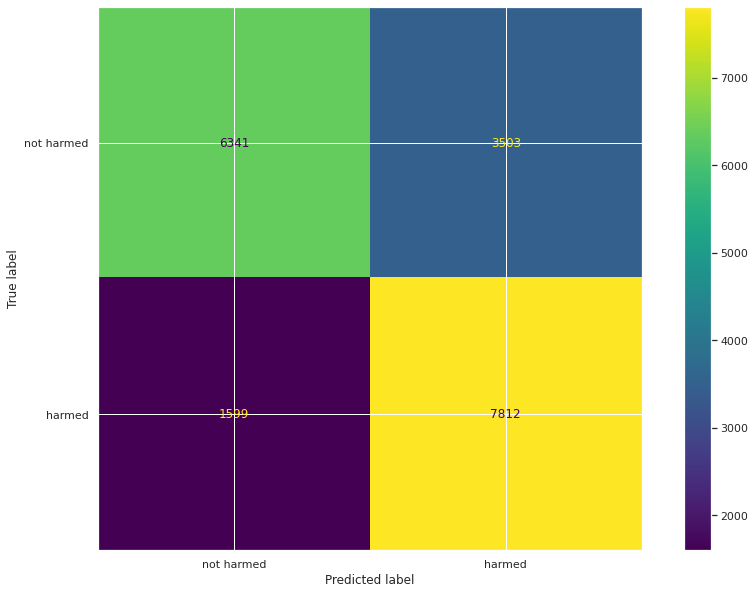

In [105]:
from sklearn.metrics import  precision_score, recall_score, f1_score, confusion_matrix
plot_confusion_matrix(xgb, X_val,y_val, values_format = 'd', display_labels=['not harmed', 'harmed'])
# print('precision\n',precision_score(y_val, xgb_prediction),'\nrecall\n',recall_score(y_val, xgb_prediction),'\nf1\n',f1_score(y_val,xgb_prediction),'\nconfusion matrix\n', confusion_matrix(y_val,xgb_prediction))
print(classification_report(y_val,xgb_prediction),'\nconfusion_matrix:\n',confusion_matrix(y_val,xgb_prediction))
precision_score(y_val, xgb_prediction, pos_label='1')


0.8162286023889583


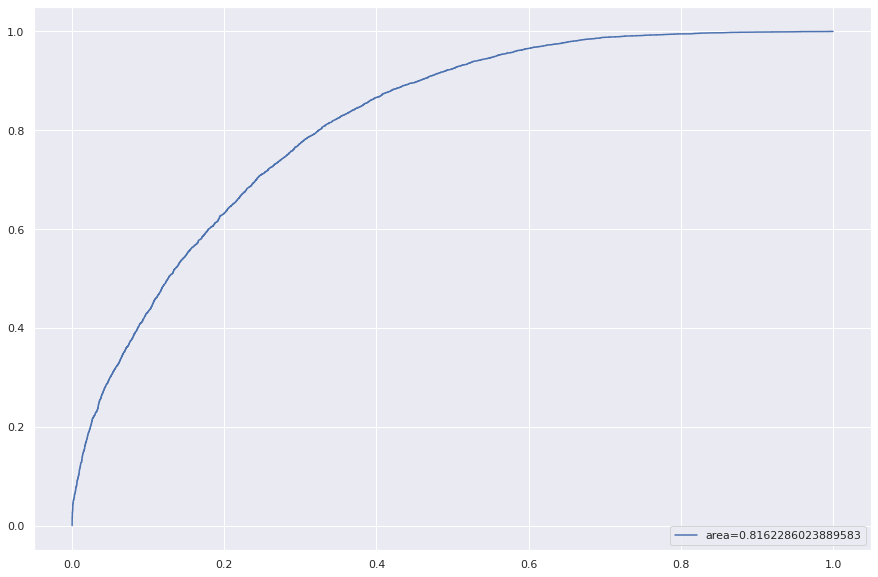

In [107]:
# Get the false positive rate and true positive rate
fpr,tpr, _= roc_curve(y_val,xgb_pred_Prob, pos_label = '1')
# Get auc value
auc = roc_auc_score(y_val,xgb_pred_Prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

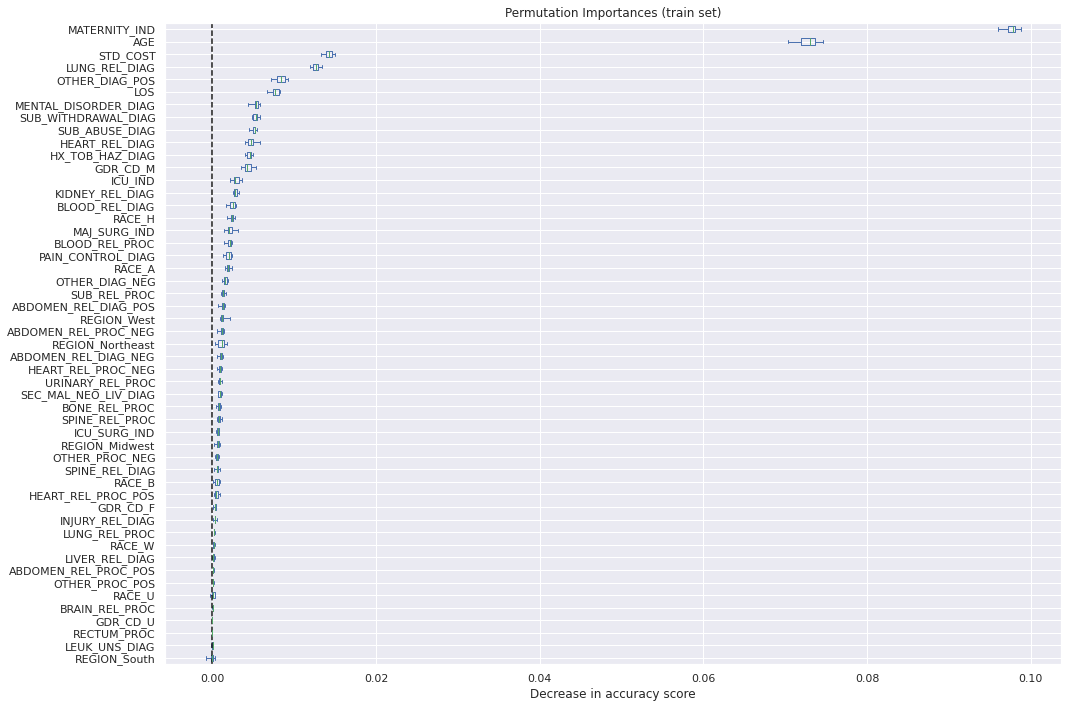

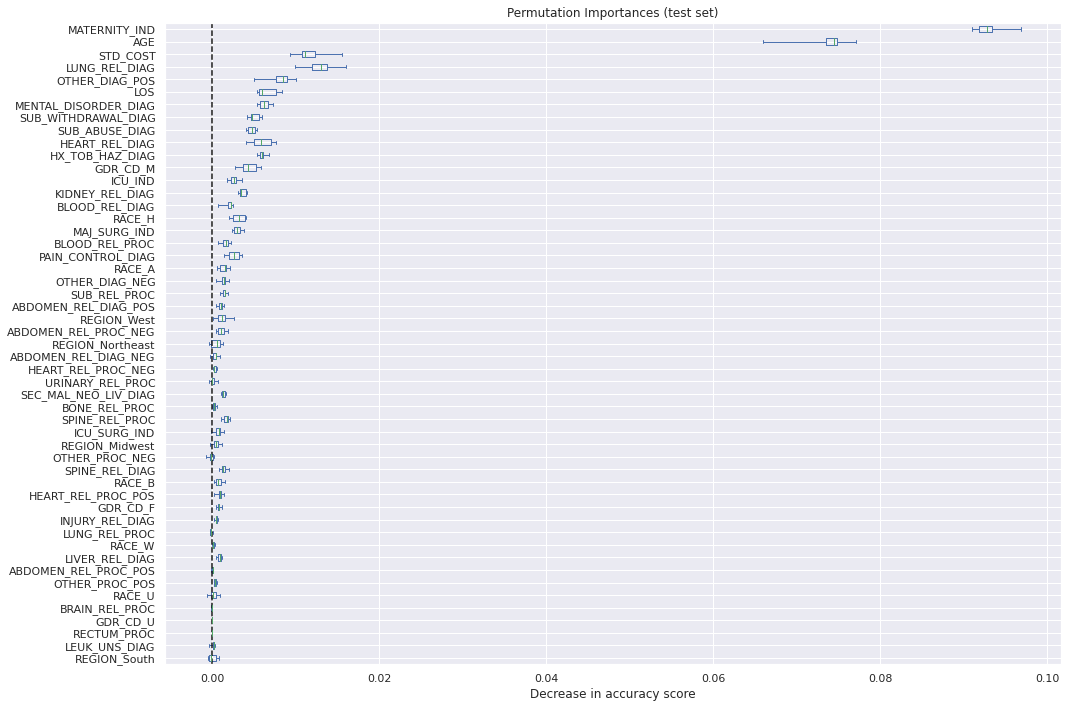

In [108]:
plot_perm(xgb)

## Neural networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras
from tensorboard.plugins.hparams import api as hp
import tensorflow as tf

HP_NUM_UNITS = hp.HParam('num_units',hp.Discrete([128]))
# HP_DROPOUT = hp.HParam('dropout',hp.RealInterval(0.1,0.2))
HP_DROPOUT = hp.HParam('dropout',hp.Discrete([0.1,0.13]))
HP_OPTIMIZER = hp.HParam('optimizer',hp.Discrete(['adam']))
HP_ACTIVATION = hp.HParam('activation',hp.Discrete(['tanh']))
# HP_REGULIZER = hp.HParam('regularizer', hp.Discrete([0.001,0.0001,0.00001]))
METRIC_ACCURACY = 'AUC'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
      hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER,HP_ACTIVATION],
      metrics =[hp.Metric(METRIC_ACCURACY, display_name='AUC')]
  )

In [ ]:
def train_test_model(hparams):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      # tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation = tf.nn.relu),
      tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation = hparams[HP_ACTIVATION],
                            kernel_regularizer = regularizers.L1L2(l1 = 0.0001, l2=0.00001),
                            bias_regularizer = regularizers.L2(0.001),
                            activity_regularizer=regularizers.L2(0.001)),




      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
        keras.layers.Dense(40, activation="tanh",
            kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-5),
            bias_regularizer=regularizers.L2(1e-3),
            activity_regularizer=regularizers.L2(1e-3)),
            
      tf.keras.layers.Dropout(0.13),

      tf.keras.layers.Dense(1, activation = 'sigmoid')
      ])
  model.compile(
    optimizer = hparams[HP_OPTIMIZER],
    loss = 'binary_crossentropy',
    metrics = ['AUC']
  )
  # model.fit(X_train, y_train, epochs = 30)
  model.fit(X_train, y_train, validation_split=0.2, epochs= 30)
  _,accuracy = model.evaluate(X_val, y_val)
  return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step = 1)

In [ ]:
session_num = 0
for num_units in HP_NUM_UNITS.domain.values:
  # for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
  for dropout_rate in HP_DROPOUT.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for activation in HP_ACTIVATION.domain.values:
        # for regularizer in HP_REGULIZER.domain.values:
          hparams = {
              HP_NUM_UNITS: num_units,
              HP_DROPOUT: dropout_rate,
              HP_OPTIMIZER: optimizer,
              HP_ACTIVATION: activation,
              # HP_REGULIZER: regularizer,
          }
          run_name = 'run-%d'%session_num
          print('--- Starting trial: %s' % run_name)
          print({h.name : hparams[h] for h in hparams})
          run('logs/hparam_tuning/' + run_name, hparams)
          session_num +=1

In [ ]:
# %load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/hparam_tuning
# !kill 1743

In [ ]:
from tensorflow.keras import regularizers

model = keras.models.Sequential([
        # keras.layers.Flatten(input_shape=[34, 1]),
        # keras.layers.Dense(256, input_dim=33, activation = 'relu'),
        # keras.layers.Dropout(0.5),


        keras.layers.Dense(40, input_dim=33, activation="relu",
            kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
            bias_regularizer=regularizers.L2(1e-4),
            activity_regularizer=regularizers.L2(1e-5)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(20, activation="relu"),
        keras.layers.Dropout(0.1),
        # keras.layers.Dense(64, activation="r 
        # keras.layers.Dropout(0.2),
        # keras.layers.Dense(150, activation="relu"),
        # keras.layers.Dropout(0.2),
        # keras.layers.Dense(150, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = 'tanh',
                          kernel_regularizer = regularizers.L1L2(l1 = 0.0001, l2=0.00001),
                          bias_regularizer = regularizers.L2(0.001),
                          activity_regularizer=regularizers.L2(0.001)),

    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation = 'tanh',
                          kernel_regularizer = regularizers.L1L2(l1 = 0.0001, l2=0.00001),
                          bias_regularizer = regularizers.L2(0.001),
                          activity_regularizer=regularizers.L2(0.001)),

    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation = 'tanh',
                          kernel_regularizer = regularizers.L1L2(l1 = 0.0001, l2=0.00001),
                          bias_regularizer = regularizers.L2(0.001),
                          activity_regularizer=regularizers.L2(0.001)),

    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation = 'tanh',
                          kernel_regularizer = regularizers.L1L2(l1 = 0.0001, l2=0.00001),
                          bias_regularizer = regularizers.L2(0.001),
                          activity_regularizer=regularizers.L2(0.001)),

    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation = 'tanh',
                          kernel_regularizer = regularizers.L1L2(l1 = 0.0001, l2=0.00001),
                          bias_regularizer = regularizers.L2(0.001),
                          activity_regularizer=regularizers.L2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

In [ ]:
# model.compile(loss="binary_crossentropy",
#                   optimizer="adam",
#                   metrics=["AUC"])
model.compile(
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
  loss = 'binary_crossentropy',
  metrics = ['BinaryAccuracy']
)
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)

# history = model.fit(x=X_train, y= y_train, validation_data=(X_val, y_val), batch_size =16, epochs= 1000, callbacks=[es])
history = model.fit(x=X_train, y= y_train, validation_split=0.1, batch_size =128, epochs= 1000, callbacks=[es])

In [ ]:
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5 )

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, roc_curve
cm = confusion_matrix(y_val,y_pred)
score = accuracy_score(y_val,y_pred)
score, p_score, r_score, report, roc, cmatrix = [x(y_val,y_pred) for x in [accuracy_score, precision_score, recall_score, classification_report,roc_auc_score, confusion_matrix]]
print(cm)
print('score is:',score)
print(report)
# score,p_score,r_score,roc,cmatrix
plt.imshow(cmatrix)
cmatrix

In [ ]:
import matplotlib.pyplot as plt
y_prob = model.predict(X_val)
# roc_curve(y_val, y_prob)
fpr,tpr, _= roc_curve(y_val,y_prob)
# Get auc value
auc = roc_auc_score(y_val,y_prob)
print(auc)
# Plot the chart
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)

In [ ]:
model.evaluate(X_val, y_val)

In [ ]:
# history = model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size =30, epochs= 1000, callbacks=[es])
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()